# Section 1: Importations

In [1687]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

In [1688]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import SCORERS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV


# Section 2: Import the training data and test data

In [1689]:
path = '/home/nick/Desktop/kaggle_titanic/'

train_df = pd.read_csv(path + 'train.csv') 
test_df = pd.read_csv(path + 'test.csv') 

In [1690]:
# set the index as PassengerId:

def set_index(df, column_name):
    """
    Set the index of the dataframe to column_name. 
    """
    return df.set_index(column_name)

train_df = set_index(train_df, 'PassengerId')
test_df = set_index(test_df, 'PassengerId')

display(train_df.head(5))
display(test_df.head(5))

display(train_df.shape)
display(test_df.shape)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

(891, 11)

(418, 10)

In [1830]:
display(train_df.Survived.value_counts())
# it is not perfectly balanced

display(342/train_df.shape[0])

0    549
1    342
Name: Survived, dtype: int64

0.3838383838383838

# Section 3: Check the number of missing values, and drop columns with more that 50% of  missing values

In [1691]:
def show_number_na(df):
    """
    Print the number of missing values for each column. 
    """
    return df.isna().sum()

print(show_number_na(train_df))
print('------')
print(show_number_na(test_df))

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
------
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [1692]:
# Age, Fare, Cabin, Embarked contain missing values. 

In [1693]:
# missing  values in percentage terms: 

def perc_missing_values(df):
    """
    Print the percentage of missing values for each column. 
    """
    perc = df.isna().sum()/df.shape[0]
    return perc 

print(perc_missing_values(train_df))
print(perc_missing_values(test_df))

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64


In [1694]:
# I drop cabin (see https://www.kaggle.com/questions-and-answers/274314):
def drop_column(df):
    """
    Drop a column of the dataframe if that column has more than 50% missing values. 
    """
    dropped_variables = []
    
    for i in df.columns:
        number_missing_val = df[i].isna().sum()  
        if number_missing_val/df.shape[0]>=0.5:
            df = df.drop([i], axis=1)
            dropped_variables.append(i)
        else:
            pass
    return df, dropped_variables


print('dropped columns for train_df:')
train_df, dropped_train = drop_column(train_df)
print(dropped_train)

print("") 

print('dropped columns for test_df:')
test_df, dropped_test = drop_column(test_df)
print(dropped_test)

print("") 

print('missing values of train_df:')
print(perc_missing_values(train_df))

print("") 

print('missing values of test_df:')
print(perc_missing_values(test_df))

dropped columns for train_df:
['Cabin']

dropped columns for test_df:
['Cabin']

missing values of train_df:
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

missing values of test_df:
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64


# Section 4: Identify ways to impute missing values, and perform imputations (use the training set only for the imputations, not the test set)

Section 4A: Imputing 'Age', 'Fare': 

In [1695]:
train_df[[x for x in train_df.columns if x!='Survived']].corr()

Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000

In [1696]:
test_df.corr()

Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age    -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp   0.001087 -0.091587  1.000000  0.306895  0.171539
Parch   0.018721 -0.061249  0.306895  1.000000  0.230046
Fare   -0.577147  0.337932  0.171539  0.230046  1.000000

In [1697]:
# it looks like Age and Fare have the strongest correlation with Pclass: For this reason, I use 
# I use the median value of Age (or Fare) by Pclass as imputation technique. 

In [1698]:
def store_medians(df, grouping_var, variables):
    """
    Create a dataframe including only the medians of "variables" by grouping_var. 
    """
    medians_by_Pclass = df.groupby(grouping_var)[variables].median()
    return medians_by_Pclass

medians_by_Pclass = store_medians(train_df, 'Pclass', ['Age', 'Fare'])
# medians_by_Pclass = train_df.groupby('Pclass')[['Age', 'Fare']].median()
display(medians_by_Pclass)

with open(path + 'pickle_file_age_fare.pkl', 'wb') as pickle_imp_age_fare: 
    pickle.dump(medians_by_Pclass, pickle_imp_age_fare)
    
# # check the pickle file: 
# with open(path + 'pickle_file_age_fare.pkl', 'rb') as pickle_imp_age_fare_load: 
#     loaded_object = pickle.load(pickle_imp_age_fare_load)
# loaded_object    

Age     Fare
Pclass               
1       37.0  60.2875
2       29.0  14.2500
3       24.0   8.0500

In [1699]:
# store the rows with ('Age' = missing values): 
check_age = train_df[train_df['Age'].isnull()]
check_age

Survived  Pclass                                      Name  \
PassengerId                                                               
6                   0       3                          Moran, Mr. James   
18                  1       2              Williams, Mr. Charles Eugene   
20                  1       3                   Masselmani, Mrs. Fatima   
27                  0       3                   Emir, Mr. Farred Chehab   
29                  1       3             O'Dwyer, Miss. Ellen "Nellie"   
...               ...     ...                                       ...   
860                 0       3                          Razi, Mr. Raihed   
864                 0       3         Sage, Miss. Dorothy Edith "Dolly"   
869                 0       3               van Melkebeke, Mr. Philemon   
879                 0       3                        Laleff, Mr. Kristo   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"   

                Sex  Age  SibSp  Parch      Ticket     Fare Embarked  
PassengerId                                                           
6              male  NaN      0      0      330877   8.4583        Q  
18             male  NaN      0      0      244373  13.0000        S  
20           female  NaN      0      0        2649   7.2250        C  
27             male  NaN      0      0        2631   7.2250        C  
29           female  NaN      0      0      330959   7.8792        Q  
...             ...  ...    ...    ...         ...      ...      ...  
860            male  NaN      0      0        2629   7.2292        C  
864          female  NaN      8      2    CA. 2343  69.5500        S  
869            male  NaN      0      0      345777   9.5000        S  
879            male  NaN      0      0      349217   7.8958        S  
889          female  NaN      1      2  W./C. 6607  23.4500        S  

[177 rows x 10 columns]

In [1700]:
# create a function that assigns medians_by_Pclass to the NA-s of the train_df/test_df: 

In [1701]:
def impute_age_fare(df, 
                    grouping_var = 'Pclass', 
                    pickle_path = path + 'pickle_file_age_fare.pkl', 
                    col_name = ['Age', 'Fare']):
    """
    Assign medians_by_Pclass to the NA-s of the dataframe called "df". 
    """
    # load the imputation dataframe: 
    with open(pickle_path, 'rb') as pickle_imp_age_fare_load: 
        imputation_df = pickle.load(pickle_imp_age_fare_load)   
    
    for i in col_name: # do it for all the variables included in col_name
        # create a dictionary: key-values are represented by Pclass-i:
        dict_imp = dict(imputation_df[i])
        for j,value in dict_imp.items():    
            #select rows such that: (Pclass = j) and (Age or Fare is null),and assign "value"
            df.loc[(df[grouping_var]==j) & (df[i].isnull()), i] = value 
           
    return df

In [1702]:
train_df = impute_age_fare(train_df)
display(train_df.isna().sum())

test_df = impute_age_fare(test_df)
display(test_df.isna().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [1703]:
# yes, it worked as expected. use check_age created above, and confront it with train_df!

In [1704]:
check_age.head(20)

Survived  Pclass                                            Name  \
PassengerId                                                                     
6                   0       3                                Moran, Mr. James   
18                  1       2                    Williams, Mr. Charles Eugene   
20                  1       3                         Masselmani, Mrs. Fatima   
27                  0       3                         Emir, Mr. Farred Chehab   
29                  1       3                   O'Dwyer, Miss. Ellen "Nellie"   
30                  0       3                             Todoroff, Mr. Lalio   
32                  1       1  Spencer, Mrs. William Augustus (Marie Eugenie)   
33                  1       3                        Glynn, Miss. Mary Agatha   
37                  1       3                                Mamee, Mr. Hanna   
43                  0       3                             Kraeff, Mr. Theodor   
46                  0       3                        Rogers, Mr. William John   
47                  0       3                               Lennon, Mr. Denis   
48                  1       3                       O'Driscoll, Miss. Bridget   
49                  0       3                             Samaan, Mr. Youssef   
56                  1       1                               Woolner, Mr. Hugh   
65                  0       1                           Stewart, Mr. Albert A   
66                  1       3                        Moubarek, Master. Gerios   
77                  0       3                               Staneff, Mr. Ivan   
78                  0       3                        Moutal, Mr. Rahamin Haim   
83                  1       3                  McDermott, Miss. Brigdet Delia   

                Sex  Age  SibSp  Parch           Ticket      Fare Embarked  
PassengerId                                                                 
6              male  NaN      0      0           330877    8.4583        Q  
18             male  NaN      0      0           244373   13.0000        S  
20           female  NaN      0      0             2649    7.2250        C  
27             male  NaN      0      0             2631    7.2250        C  
29           female  NaN      0      0           330959    7.8792        Q  
30             male  NaN      0      0           349216    7.8958        S  
32           female  NaN      1      0         PC 17569  146.5208        C  
33           female  NaN      0      0           335677    7.7500        Q  
37             male  NaN      0      0             2677    7.2292        C  
43             male  NaN      0      0           349253    7.8958        C  
46             male  NaN      0      0  S.C./A.4. 23567    8.0500        S  
47             male  NaN      1      0           370371   15.5000        Q  
48           female  NaN      0      0            14311    7.7500        Q  
49             male  NaN      2      0             2662   21.6792        C  
56             male  NaN      0      0            19947   35.5000        S  
65             male  NaN      0      0         PC 17605   27.7208        C  
66             male  NaN      1      1             2661   15.2458        C  
77             male  NaN      0      0           349208    7.8958        S  
78             male  NaN      0      0           374746    8.0500        S  
83           female  NaN      0      0           330932    7.7875        Q

In [1705]:
train_df.head(40)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28                  0       1   
29                  1       3   
30                  0       3   
31                  0       1   
32                  1       1   
33                  1       3   
34                  0       2   
35                  0       1   
36                  0       1   
37                  1       3   
38                  0       3   
39                  0       3   
40                  1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male  24.0   
7                                      McCarthy, Mr. Timothy J    male  54.0   
8                               Palsson, Master. Gosta Leonard    male   2.0   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
11                             Sandstrom, Miss. Marguerite Rut  female   4.0   
12                                    Bonnell, Miss. Elizabeth  female  58.0   
13                              Saundercock, Mr. William Henry    male  20.0   
14                                 Andersson, Mr. Anders Johan    male  39.0   
15                        Vestrom, Miss. Hulda Amanda Adolfina  female  14.0   
16                            Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
17                                        Rice, Master. Eugene    male   2.0   
18                                Williams, Mr. Charles Eugene    male  29.0   
19           Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
20                                     Masselmani, Mrs. Fatima  female  24.0   
21                                        Fynney, Mr. Joseph J    male  35.0   
22                                       Beesley, Mr. Lawrence    male  34.0   
23                                 McGowan, Miss. Anna "Annie"  female  15.0   
24                                Sloper, Mr. William Thompson    male  28.0   
25                               Palsson, Miss. Torborg Danira  female   8.0   
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
27                                     Emir, Mr. Farred Chehab    male  24.0   
28                              Fortune, Mr. Charles Alexander    male  19.0   
29                               O'Dwyer, Miss. Ellen "Nellie"  female  24.0   
30                                         Todoroff, Mr. Lalio    male  24.0   
31                                    Uruchurtu, Don. Manuel E    

Section 4B: Imputing 'Embarked' (I simply use the mode/most common value of Embarked from the training set): 

(Note: there are only 2 missing values in the training set, none in the test set. )

In [1706]:
mode_Embarked = train_df.Embarked.mode()[0]
with open(path + 'pickle_file_for_embarked_imp.pkl', 'wb') as pickle_file_Embarked:
    pickle.dump(mode_Embarked, pickle_file_Embarked)
    pickle_file_Embarked.close()
    
# # check the pickle file: 
# with open(path + 'pickle_file_for_embarked_imp.pkl', 'rb') as pickle_file_Embarked_read:
#     imput_embarked = pickle.load(pickle_file_Embarked_read)
    
# imput_embarked

In [1707]:
def imputation_missings(df, pickle_path, col_name = 'Embarked'):
    """
    Imputation for the the column named 'col_name'. 
    """
    count_missing_val = df[col_name].isna().sum()
    if count_missing_val == 0:
        pass 
    else: 
        pickle_file = open(pickle_path, 'rb')
        imp_value = pickle.load(pickle_file)
        pickle_file.close()
        # materially fill the NA-s: 
        df[col_name].fillna(imp_value, inplace = True)
    
    return df
    
test_df = imputation_missings(test_df, path + 'pickle_file_for_embarked_imp.pkl', 'Embarked')
train_df = imputation_missings(train_df, path + 'pickle_file_for_embarked_imp.pkl', 'Embarked')

print("") 

print('missing values of train_df:')
print(perc_missing_values(train_df))

print("") 

print('missing values of test_df:')
print(perc_missing_values(test_df))


missing values of train_df:
Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

missing values of test_df:
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [1708]:
# there is no missing value anymore, neither in the train_df nor test_df

# Section 5: Feature Engineering

Section 5A: Feature Engineering for "Ticket" column

In [1709]:
# check whether "ticket" is similar between train_df and test_df 

In [1710]:
train_ticket_list = list(set(train_df.Ticket))
display(train_ticket_list)
len(train_ticket_list)
# output: 681. thus there are some common values of Ticket among the 981 rows/data points. 

['248738',
 '231919',
 '17465',
 '11771',
 '330935',
 '14973',
 '6563',
 '244373',
 '383121',
 '110413',
 '111320',
 '345781',
 '219533',
 '35851',
 '349203',
 '2641',
 'STON/O 2. 3101288',
 '7546',
 '349253',
 'STON/O 2. 3101292',
 '349909',
 '28228',
 'PC 17599',
 '364516',
 'C.A. 17248',
 'C 7076',
 '347064',
 '349204',
 '315082',
 '343276',
 '371060',
 '349217',
 'SOTON/O2 3101272',
 '244270',
 '2223',
 '250655',
 '234818',
 'A/4. 34244',
 '2625',
 'SOTON/O2 3101287',
 'STON/O2. 3101282',
 '29751',
 'C.A./SOTON 34068',
 '234604',
 '11769',
 '2626',
 'PC 17601',
 '244310',
 'F.C.C. 13528',
 '113043',
 '347063',
 'SOTON/O.Q. 3101312',
 '315086',
 '29108',
 'A/5. 2151',
 '349233',
 '110152',
 '112053',
 '350046',
 'SC/PARIS 2131',
 '113514',
 '349228',
 '330909',
 '312992',
 '349243',
 '26360',
 '350050',
 '350048',
 '2651',
 '230136',
 'A4. 54510',
 '349206',
 'F.C.C. 13531',
 '349249',
 '347088',
 '343120',
 '350042',
 '347081',
 '26707',
 '113028',
 '370371',
 'SOTON/O.Q. 3101307',

681

In [1711]:
test_ticket_list = list(set(test_df.Ticket))
display(test_ticket_list)
len(test_ticket_list)
# output: 363. thus there are some common values of Ticket among the 418 rows/data points. 

['248738',
 '220844',
 '3410',
 '2688',
 '376563',
 '370374',
 '349909',
 'PC 17599',
 '17475',
 '330844',
 '359309',
 '383162',
 'A/5 1478',
 '2654',
 '2625',
 'STON/O2. 3101270',
 '240261',
 '347070',
 '11769',
 'PC 17562',
 '13050',
 '350054',
 'F.C.C. 13528',
 '28404',
 '347090',
 '348122',
 'SOTON/O.Q. 3101308',
 'F.C.C. 13540',
 'PC 17606',
 '26360',
 '230136',
 '330968',
 '17770',
 '248734',
 '370368',
 '26707',
 'C.A. 49867',
 '370371',
 '237734',
 '233478',
 'PC 17759',
 'S.O./P.P. 752',
 'SOTON/OQ 392083',
 'PC 17585',
 '349255',
 '334915',
 'A/5 21175',
 '248726',
 '2670',
 '29750',
 '113780',
 '3701',
 '237249',
 '345768',
 'SC/PARIS 2167',
 'W./C. 14260',
 '2656',
 'PC 17756',
 '345498',
 '347066',
 '347465',
 '2676',
 'F.C.C. 13534',
 '113059',
 '3101266',
 '237670',
 '347469',
 '383123',
 'PC 17760',
 '2682',
 '3101295',
 '315087',
 '330911',
 '2926',
 'S.O./P.P. 2',
 '36928',
 '350405',
 '233734',
 '347471',
 '28034',
 '2657',
 '28221',
 'SOTON/O.Q. 3101262',
 'PC 17594

363

In [1712]:
common_values_Ticket_tr_test = [x for x in test_ticket_list  if x in train_ticket_list]
display(common_values_Ticket_tr_test)
len(common_values_Ticket_tr_test)

['248738',
 '349909',
 'PC 17599',
 '2625',
 '11769',
 'F.C.C. 13528',
 '26360',
 '230136',
 '26707',
 '370371',
 'PC 17759',
 'PC 17585',
 '29750',
 'SC/PARIS 2167',
 'PC 17756',
 '113059',
 'PC 17760',
 '3101295',
 '2926',
 '36928',
 'C 4001',
 '2653',
 'C.A. 2673',
 '11753',
 '11765',
 '2680',
 '2668',
 'C.A. 34651',
 '113773',
 'A/5. 3337',
 '244358',
 '347080',
 'PC 17758',
 'W.E.P. 5734',
 '349256',
 'PC 17558',
 '28664',
 'CA 2144',
 '386525',
 '349910',
 'SC/Paris 2123',
 '392091',
 '24160',
 '345572',
 '376566',
 '367226',
 'A/4 48871',
 '19950',
 'S.O.C. 14879',
 '347077',
 '1601',
 'PC 17592',
 'S.C./PARIS 2079',
 'PC 17569',
 '112058',
 '370129',
 'PC 17608',
 '382652',
 '237789',
 '113796',
 '2003',
 '250651',
 '110813',
 'PP 9549',
 'C.A. 33112',
 '13567',
 '36568',
 '28220',
 '12749',
 '3101298',
 'A/5. 851',
 '364498',
 '19877',
 'C.A. 6212',
 '113503',
 '17464',
 'PC 17603',
 '345763',
 'C.A. 37671',
 '29103',
 '11813',
 'C.A. 33595',
 'PC 17483',
 '350026',
 '17463',


115

In [1713]:
different_values_Ticket_tr_test = [x for x in test_ticket_list  if x not in train_ticket_list]
display(different_values_Ticket_tr_test)
len(different_values_Ticket_tr_test)

['220844',
 '3410',
 '2688',
 '376563',
 '370374',
 '17475',
 '330844',
 '359309',
 '383162',
 'A/5 1478',
 '2654',
 'STON/O2. 3101270',
 '240261',
 '347070',
 'PC 17562',
 '13050',
 '350054',
 '28404',
 '347090',
 '348122',
 'SOTON/O.Q. 3101308',
 'F.C.C. 13540',
 'PC 17606',
 '330968',
 '17770',
 '248734',
 '370368',
 'C.A. 49867',
 '237734',
 '233478',
 'S.O./P.P. 752',
 'SOTON/OQ 392083',
 '349255',
 '334915',
 'A/5 21175',
 '248726',
 '2670',
 '113780',
 '3701',
 '237249',
 '345768',
 'W./C. 14260',
 '2656',
 '345498',
 '347066',
 '347465',
 '2676',
 'F.C.C. 13534',
 '3101266',
 '237670',
 '347469',
 '383123',
 '2682',
 '315087',
 '330911',
 'S.O./P.P. 2',
 '350405',
 '233734',
 '347471',
 '28034',
 '2657',
 '28221',
 'SOTON/O.Q. 3101262',
 'PC 17594',
 'SOTON/O.Q. 3101309',
 '330963',
 '13905',
 'AQ/4 3130',
 '24065',
 '244360',
 '349220',
 'SC/PARIS 2148',
 '367227',
 '680',
 'A/4 48873',
 'CA 31352',
 'A/4 31416',
 'PC 17613',
 '7266',
 'SOTON/O.Q. 3101314',
 '28133',
 '349232'

248

In [1714]:
# There are 115 values in common for Ticket (between train_df and test_df) out of 363 distinct values.  

https://www.kaggle.com/getting-started/77861:
        
- "recode the categories so that the rare values are now common. For example. creating a category 'other' for all those mismatched categories." 


In [1715]:
def recode_ticket(df, common_values_Ticket_tr_test, col_name="Ticket"):
    """
    Recode the Ticket column: if a category is not share between train_df and test_df (use common_values_Ticket_tr_test), 
    then set it to "other".
    """
    df[col_name] = df[col_name].map(lambda x: x if x in common_values_Ticket_tr_test else 'other')
    
    return df[col_name]

train_df['Ticket'] = recode_ticket(train_df, common_values_Ticket_tr_test, "Ticket")
test_df['Ticket'] = recode_ticket(test_df, common_values_Ticket_tr_test, "Ticket")  

In [1716]:
train_df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female  24.0   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch      Ticket     Fare Embarked  
PassengerId                                              
1                1      0       other   7.2500        S  
2                1      0    PC 17599  71.2833        C  
3                0      0       other   7.9250        S  
4                1      0       other  53.1000        S  
5                0      0       other   8.0500        S  
...            ...    ...         ...      ...      ...  
887              0      0       other  13.0000        S  
888              0      0       other  30.0000        S  
889              1      2  W./C. 6607  23.4500        S  
890              0      0       other  30.0000        C  
891              0      0       other   7.7500        Q  

[891 rows x 10 columns]

In [1717]:
# check whether recode_ticket() worked correctly: 
display(train_df.Ticket.nunique())
display(test_df.Ticket.nunique())

# display(train_df.Ticket.unique())
# display(test_df.Ticket.unique())

print('print the common values: ')
commo_values_Tckt = [x for x in list(set(test_df.Ticket))  if x  in list(set(train_df.Ticket)) ]
display(len(commo_values_Tckt))
display(commo_values_Tckt)

print('')
print('print the different values: ')
diff_values_Tckt = [x for x in list(set(test_df.Ticket))  if x not in list(set(train_df.Ticket)) ]
display(len(diff_values_Tckt))
display(diff_values_Tckt)

116

116

print the common values: 


116

['248738',
 '112058',
 '370129',
 'PC 17608',
 '382652',
 'C.A. 33595',
 'PC 17483',
 '237789',
 'C 4001',
 '113796',
 '2653',
 'C.A. 2673',
 '349909',
 '350026',
 'PC 17599',
 '2003',
 '17463',
 '11753',
 'PC 17755',
 '250651',
 '11765',
 '2680',
 'CA. 2343',
 '2668',
 'C.A. 34651',
 '113773',
 '2625',
 '110813',
 '11769',
 'A/5. 3337',
 'F.C.C. 13528',
 'PP 9549',
 '244358',
 'W./C. 6608',
 '347080',
 'PC 17758',
 'C.A. 33112',
 '13567',
 'W.E.P. 5734',
 '349256',
 '2678',
 'W./C. 6607',
 'PC 17558',
 'F.C. 12750',
 '26360',
 '315153',
 '230136',
 '29105',
 'SC/AH 3085',
 '26707',
 '370371',
 'PC 17761',
 'PC 17759',
 '2689',
 '36568',
 'CA 2144',
 '28664',
 '28220',
 'PC 17585',
 '386525',
 'PC 17597',
 '236853',
 '349910',
 '12749',
 '3101298',
 '29750',
 'PC 17757',
 '11767',
 'C.A. 2315',
 'SC/PARIS 2167',
 '4133',
 'A/5. 851',
 '364498',
 '220845',
 '19877',
 'PC 17756',
 '226875',
 '19928',
 '371362',
 '113781',
 '113059',
 'SC/Paris 2123',
 'C.A. 6212',
 '392091',
 '24160',
 '


print the different values: 


0

[]

In [1718]:
def create_dummies(df, col_name=['Ticket']):
    """
    Create dummies from a categorical variable. 
    """
    df = pd.get_dummies(df, columns=col_name) 
    return df

train_df = create_dummies(train_df, ['Ticket'])
test_df = create_dummies(test_df, ['Ticket'])

Section 5B: Feature engineering for "Age"

In [1719]:
# is Age strongly correlated with Survived? 
train_df.corr()
# answer: low correlation

Survived    Pclass       Age     SibSp     Parch  \
Survived              1.000000 -0.338481 -0.047255 -0.035322  0.081629   
Pclass               -0.338481  1.000000 -0.408487  0.083081  0.018443   
Age                  -0.047255 -0.408487  1.000000 -0.243526 -0.171095   
SibSp                -0.035322  0.083081 -0.243526  1.000000  0.414838   
Parch                 0.081629  0.018443 -0.171095  0.414838  1.000000   
...                        ...       ...       ...       ...       ...   
Ticket_SC/Paris 2123  0.033803 -0.021469 -0.054447  0.025156  0.116767   
Ticket_W./C. 6607    -0.037436  0.039243 -0.018154  0.020528  0.095286   
Ticket_W./C. 6608    -0.053002  0.055561 -0.028239  0.059529  0.176586   
Ticket_W.E.P. 5734   -0.026456 -0.052496  0.042881  0.014507 -0.015878   
Ticket_other         -0.123204  0.114142  0.113248 -0.404470 -0.405794   

                          Fare  Ticket_110813  Ticket_112058  Ticket_113059  \
Survived              0.257307       0.042470      -0.026456      -0.026456   
Pclass               -0.549500      -0.052496      -0.052496      -0.052496   
Age                   0.123784       0.078333       0.020090      -0.002700   
SibSp                 0.159651       0.014507      -0.015907      -0.015907   
Parch                 0.216225      -0.015878      -0.015878      -0.015878   
...                        ...            ...            ...            ...   
Ticket_SC/Paris 2123  0.010972      -0.001948      -0.001948      -0.001948   
Ticket_W./C. 6607    -0.008360      -0.001590      -0.001590      -0.001590   
Ticket_W./C. 6608     0.002935      -0.002251      -0.002251      -0.002251   
Ticket_W.E.P. 5734    0.019553      -0.001124      -0.001124      -0.001124   
Ticket_other         -0.413025      -0.060932      -0.060932      -0.060932   

                      Ticket_113503  ...  Ticket_S.C./PARIS 2079  \
Survived                  -0.026456  ...                0.011329   
Pclass                    -0.052496  ...               -0.017519   
Age                       -0.005233  ...               -0.046820   
SibSp                     -0.015907  ...               -0.000990   
Parch                      0.067340  ...                0.065848   
...                             ...  ...                     ...   
Ticket_SC/Paris 2123      -0.001948  ...               -0.002757   
Ticket_W./C. 6607         -0.001590  ...               -0.002250   
Ticket_W./C. 6608         -0.002251  ...               -0.003185   
Ticket_W.E.P. 5734        -0.001124  ...               -0.001590   
Ticket_other              -0.060932  ...               -0.086220   

                      Ticket_S.O.C. 14879  Ticket_SC/AH 29037  \
Survived                        -0.059292           -0.026456   
Pclass                          -0.027747           -0.012381   
Age                             -0.033293            0.020090   
SibSp                            0.046145            0.014507   
Parch                           -0.035583           -0.015878   
...                                   ...                 ...   
Ticket_SC/Paris 2123            -0.004366           -0.001948   
Ticket_W./C. 6607               -0.003563           -0.001590   
Ticket_W./C. 6608               -0.005045           -0.002251   
Ticket_W.E.P. 5734              -0.002518           -0.001124   
Ticket_other                    -0.136556           -0.060932   

                      Ticket_SC/AH 3085  Ticket_SC/PARIS 2167  \
Survived                       0.042470             -0.026456   
Pclass                        -0.012381             -0.012381   
Age                            0.032752             -0.000168   
SibSp                          0.014507              0.014507   
Parch                         -0.015878             -0.015878   
...                                 ...                   ...   
Ticket_SC/Paris 2123          -0.001948             -0.001948   
Ticket_W./C. 6607             -0.001590             -0.001590   
T

<AxesSubplot:>

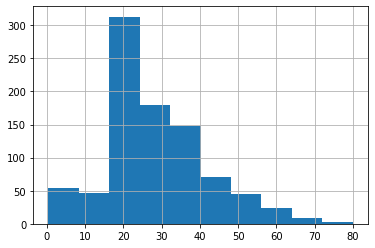

In [1720]:
train_df.Age.hist()

<AxesSubplot:>

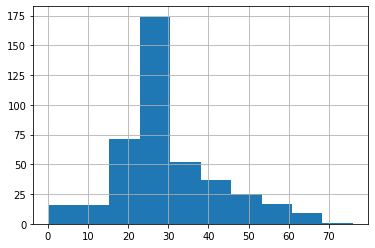

In [1721]:
test_df.Age.hist()

In [1722]:
def create_age_groups(df, col_name="Age"):
    """
    Create age groups from the discrete "Age" variable. 
    """
    new_col_name = col_name + '_groups' 
    df[new_col_name] = pd.cut(x=df[col_name], 
                     bins=[0, 3, 17, 63, 99],
                     labels=['Baby_Toddler', 'Child', 'Adult', 'Elderly']) 
    # labels=['Baby/Toddler', 'Child', 'Adult', 'Elderly']: see https://www.geeksforgeeks.org/pandas-cut-continuous-to-categorical/
    return df[new_col_name]

train_df['Age_groups'] = create_age_groups(train_df, "Age")
test_df['Age_groups'] = create_age_groups(test_df, "Age")

# create the dummies: 
train_df = create_dummies(train_df, ['Age_groups'])
train_df

test_df = create_dummies(test_df, ['Age_groups'])
test_df

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
...             ...                                           ...     ...   
1305              3                            Spector, Mr. Woolf    male   
1306              1                  Oliva y Ocana, Dona. Fermina  female   
1307              3                  Saether, Mr. Simon Sivertsen    male   
1308              3                           Ware, Mr. Frederick    male   
1309              3                      Peter, Master. Michael J    male   

              Age  SibSp  Parch      Fare Embarked  Ticket_110813  \
PassengerId                                                         
892          34.5      0      0    7.8292        Q              0   
893          47.0      1      0    7.0000        S              0   
894          62.0      0      0    9.6875        Q              0   
895          27.0      0      0    8.6625        S              0   
896          22.0      1      1   12.2875        S              0   
...           ...    ...    ...       ...      ...            ...   
1305         24.0      0      0    8.0500        S              0   
1306         39.0      0      0  108.9000        C              0   
1307         38.5      0      0    7.2500        S              0   
1308         24.0      0      0    8.0500        S              0   
1309         24.0      1      1   22.3583        C              0   

             Ticket_112058  ...  Ticket_SC/PARIS 2167  Ticket_SC/Paris 2123  \
PassengerId                 ...                                               
892                      0  ...                     0                     0   
893                      0  ...                     0                     0   
894                      0  ...                     0                     0   
895                      0  ...                     0                     0   
896                      0  ...                     0                     0   
...                    ...  ...                   ...                   ...   
1305                     0  ...                     0                     0   
1306                     0  ...                     0                     0   
1307                     0  ...                     0                     0   
1308                     0  ...                     0                     0   
1309                     0  ...                     0                     0   

             Ticket_W./C. 6607  Ticket_W./C. 6608  Ticket_W.E.P. 5734  \
PassengerId                                                             
892                          0                  0                   0   
893                          0                  0                   0   
894                          0                  0                   0   
895                          0                  0                   0   
896                          0                  0                   0   
...                        ...                ...                 ...   
1305                         0                  0                   0   
1306                         0                  0                   0   
1307                         0                  0                   0   
1308                         0                  0                   0   
1309                         0                  0                   0   

             Ticket_other  Age_groups_Baby_Toddler  Age_groups_Child  \
PassengerId                                                    

In [1723]:
train_df.corr()  

Survived    Pclass       Age     SibSp     Parch  \
Survived                 1.000000 -0.338481 -0.047255 -0.035322  0.081629   
Pclass                  -0.338481  1.000000 -0.408487  0.083081  0.018443   
Age                     -0.047255 -0.408487  1.000000 -0.243526 -0.171095   
SibSp                   -0.035322  0.083081 -0.243526  1.000000  0.414838   
Parch                    0.081629  0.018443 -0.171095  0.414838  1.000000   
...                           ...       ...       ...       ...       ...   
Ticket_other            -0.123204  0.114142  0.113248 -0.404470 -0.405794   
Age_groups_Baby_Toddler  0.108558  0.050193 -0.386298  0.204989  0.228247   
Age_groups_Child         0.072585  0.112678 -0.420368  0.243822  0.222062   
Age_groups_Adult        -0.090315 -0.085231  0.424655 -0.295467 -0.307537   
Age_groups_Elderly      -0.076793 -0.100953  0.366027 -0.040758  0.012075   

                             Fare  Ticket_110813  Ticket_112058  \
Survived                 0.257307       0.042470      -0.026456   
Pclass                  -0.549500      -0.052496      -0.052496   
Age                      0.123784       0.078333       0.020090   
SibSp                    0.159651       0.014507      -0.015907   
Parch                    0.216225      -0.015878      -0.015878   
...                           ...            ...            ...   
Ticket_other            -0.413025      -0.060932      -0.060932   
Age_groups_Baby_Toddler  0.004360      -0.006257      -0.006257   
Age_groups_Child        -0.011346      -0.010743      -0.010743   
Age_groups_Adult        -0.005006       0.013604       0.013604   
Age_groups_Elderly       0.035489      -0.004079      -0.004079   

                         Ticket_113059  Ticket_113503  ...  \
Survived                     -0.026456      -0.026456  ...   
Pclass                       -0.052496      -0.052496  ...   
Age                          -0.002700      -0.005233  ...   
SibSp                        -0.015907      -0.015907  ...   
Parch                        -0.015878       0.067340  ...   
...                                ...            ...  ...   
Ticket_other                 -0.060932      -0.060932  ...   
Age_groups_Baby_Toddler      -0.006257      -0.006257  ...   
Age_groups_Child             -0.010743      -0.010743  ...   
Age_groups_Adult              0.013604       0.013604  ...   
Age_groups_Elderly           -0.004079      -0.004079  ...   

                         Ticket_SC/PARIS 2167  Ticket_SC/Paris 2123  \
Survived                            -0.026456              0.033803   
Pclass                              -0.012381             -0.021469   
Age                                 -0.000168             -0.054447   
SibSp                                0.014507              0.025156   
Parch                               -0.015878              0.116767   
...                                       ...                   ...   
Ticket_other                        -0.060932             -0.105657   
Age_groups_Baby_Toddler             -0.006257              0.096561   
Age_groups_Child                    -0.010743             -0.018629   
Age_groups_Adult                     0.013604             -0.032014   
Age_groups_Elderly                  -0.004079             -0.007073   

                         Ticket_W./C. 6607  Ticket_W./C. 6608  \
Survived                         -0.037436          -0.053002   
Pclass                            0.039243           0.055561   
Age                              -0.018154          -0.028239   
SibSp                             0.020528           0.059529   
Parch                             0.095286           0.176586   
...                                    ...                ...   
Ticket_other                     -0.086220          -0.122071   
Age_groups_Baby_Toddler          -0.008854          -0.012535   
Age_groups_Child                 -0.015202           0.094001   
Age_groups_Adult                  0.019249     

In [1724]:
# Age_groups' dummies are more correlated with Survived (compared to "Age"). 
# conclusion: use Age_groups' dummies rather than Age. 

Section 5C: Feature engineering for "Pclass"

In [1725]:
train_df = create_dummies(train_df, ['Pclass'])
test_df = create_dummies(test_df, ['Pclass'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058',
       ...
       'Ticket_W./C. 6608', 'Ticket_W.E.P. 5734', 'Ticket_other',
       'Age_groups_Baby_Toddler', 'Age_groups_Child', 'Age_groups_Adult',
       'Age_groups_Elderly', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object', length=131)

Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058', 'Ticket_113059',
       ...
       'Ticket_W./C. 6608', 'Ticket_W.E.P. 5734', 'Ticket_other',
       'Age_groups_Baby_Toddler', 'Age_groups_Child', 'Age_groups_Adult',
       'Age_groups_Elderly', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object', length=130)

Section 5D: Feature engineering for "sex"

In [1726]:
train_df = create_dummies(train_df, ['Sex'])
test_df = create_dummies(test_df, ['Sex'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Ticket_110813', 'Ticket_112058', 'Ticket_113059',
       ...
       'Ticket_other', 'Age_groups_Baby_Toddler', 'Age_groups_Child',
       'Age_groups_Adult', 'Age_groups_Elderly', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=132)

Index(['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503',
       ...
       'Ticket_other', 'Age_groups_Baby_Toddler', 'Age_groups_Child',
       'Age_groups_Adult', 'Age_groups_Elderly', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object', length=131)

Section 5E: Feature engineering for "SibSp"

In [1727]:
train_df.SibSp.min(), train_df.SibSp.max()

(0, 8)

In [1728]:
test_df.SibSp.min(), test_df.SibSp.max()

(0, 8)

In [1729]:
train_df[['Survived', 'SibSp', 'Parch']].corr()

Survived     SibSp     Parch
Survived  1.000000 -0.035322  0.081629
SibSp    -0.035322  1.000000  0.414838
Parch     0.081629  0.414838  1.000000

In [1730]:
train_df = create_dummies(train_df, ['SibSp'])
test_df = create_dummies(test_df, ['SibSp'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503',
       ...
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object', length=138)

Index(['Name', 'Age', 'Parch', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503', 'Ticket_113509',
       ...
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object', length=137)

In [1731]:
train_df[['Survived', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']].corr() 

Survived   SibSp_0   SibSp_1   SibSp_2   SibSp_3   SibSp_4  \
Survived  1.000000 -0.115867  0.173076  0.029796 -0.037215 -0.064123   
SibSp_0  -0.115867  1.000000 -0.811408 -0.264017 -0.198205 -0.210469   
SibSp_1   0.173076 -0.811408  1.000000 -0.099714 -0.074858 -0.079490   
SibSp_2   0.029796 -0.264017 -0.099714  1.000000 -0.024357 -0.025864   
SibSp_3  -0.037215 -0.198205 -0.074858 -0.024357  1.000000 -0.019417   
SibSp_4  -0.064123 -0.210469 -0.079490 -0.025864 -0.019417  1.000000   
SibSp_5  -0.059292 -0.110110 -0.041586 -0.013531 -0.010158 -0.010787   
SibSp_8  -0.070234 -0.130431 -0.049261 -0.016029 -0.012033 -0.012778   

           SibSp_5   SibSp_8  
Survived -0.059292 -0.070234  
SibSp_0  -0.110110 -0.130431  
SibSp_1  -0.041586 -0.049261  
SibSp_2  -0.013531 -0.016029  
SibSp_3  -0.010158 -0.012033  
SibSp_4  -0.010787 -0.012778  
SibSp_5   1.000000 -0.006685  
SibSp_8  -0.006685  1.000000

In [1732]:
# use dummies rather than the categorical "SibSp"

Section 5F: Feature engineering for "Parch"

In [1733]:
train_df[['Survived', 'Parch']].corr() 

Survived     Parch
Survived  1.000000  0.081629
Parch     0.081629  1.000000

In [1734]:
# how many categories exist in train_df and in test_df? 
print(train_df.Parch.min(), train_df.Parch.max())
print(test_df.Parch.min(), test_df.Parch.max())

print("")
print(train_df.Parch.value_counts(), test_df.Parch.value_counts())


0 6
0 9

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


In [1735]:
def recode_parch(df, col_name='Parch'):
    """
    Recode Parch to have categories from 1 to 6. Category 1 represents having zero or 1 ParCh. 
    Category 6 represents having 6 ParCh or more than 6 ParCh. 
    """
    df[col_name] = df[col_name].map(lambda x: 6 if x>6 else x)
    df[col_name] = df[col_name].map(lambda x: 1 if x<1 else x)
    return df[col_name] 

In [1736]:
train_df['Parch'] = recode_parch(train_df, 'Parch')
test_df['Parch'] = recode_parch(test_df, 'Parch')

print(train_df.Parch.value_counts()) 
print(test_df.Parch.value_counts())

1    796
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
1    376
2     33
3      3
6      3
4      2
5      1
Name: Parch, dtype: int64


In [1737]:
train_df = create_dummies(train_df, ['Parch'])
test_df = create_dummies(test_df, ['Parch'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Embarked', 'Ticket_110813',
       'Ticket_112058', 'Ticket_113059', 'Ticket_113503', 'Ticket_113509',
       ...
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object', length=143)

Index(['Name', 'Age', 'Fare', 'Embarked', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object', length=142)

In [1738]:
train_df[['Survived', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6']].corr() 

Survived   Parch_1   Parch_2   Parch_3   Parch_4   Parch_5   Parch_6
Survived  1.000000 -0.056346  0.075020  0.033391 -0.053002 -0.028398 -0.026456
Parch_1  -0.056346  1.000000 -0.909137 -0.217452 -0.194385 -0.217452 -0.097029
Parch_2   0.075020 -0.909137  1.000000 -0.023594 -0.021091 -0.023594 -0.010528
Parch_3   0.033391 -0.217452 -0.023594  1.000000 -0.005045 -0.005643 -0.002518
Parch_4  -0.053002 -0.194385 -0.021091 -0.005045  1.000000 -0.005045 -0.002251
Parch_5  -0.028398 -0.217452 -0.023594 -0.005643 -0.005045  1.000000 -0.002518
Parch_6  -0.026456 -0.097029 -0.010528 -0.002518 -0.002251 -0.002518  1.000000

Section 5G: Feature engineering for "Embarked"

In [1739]:
train_df = create_dummies(train_df, ['Embarked'])
test_df = create_dummies(test_df, ['Embarked'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=145)

Index(['Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       'Ticket_113781',
       ...
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=144)

Section 5H: Feature engineering for "Fare"

<AxesSubplot:>

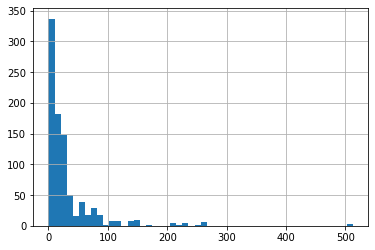

In [1740]:
train_df.Fare.hist(bins=50)

<AxesSubplot:>

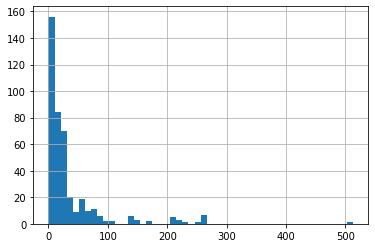

In [1741]:
test_df.Fare.hist(bins=50)

In [1742]:
train_df[['Survived', "Fare"]].corr()

Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000

In [1743]:
# I simply use "Fare" and i don't create categorical dummies out of Fare, because the correlation is not too low. 

Section 5I: Feature engineering for "Name"

In [1744]:
# extract the titles such as "Mr.", "Dr.", etcetera

In [1745]:
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [1746]:
list_names_test = list(set(test_df['Title'] ))
list_names_train = list(set(train_df['Title'] ))

list_common_titles = [x for x in list_names_test if x in list_names_train ]

In [1747]:
display([x for x in list_names_test if x not in list_names_train ])
display([x for x in list_names_train  if x not in  list_names_test])

['Dona']

['Countess', 'Jonkheer', 'Lady', 'Sir', 'Don', 'Mlle', 'Capt', 'Mme', 'Major']

In [1748]:
list_common_titles

['Miss', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

In [1749]:
# I use the recode_ticket() function created above to recode some categories to "other"

train_df['Title'] = recode_ticket(train_df, list_common_titles, "Title")
test_df['Title'] = recode_ticket(test_df, list_common_titles, "Title")  

In [1750]:
display([x for x in list(set(train_df['Title']))])
display([x for x in list(set(test_df['Title']))])

['Miss', 'other', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

['Miss', 'other', 'Mrs', 'Rev', 'Ms', 'Mr', 'Master', 'Col', 'Dr']

In [1751]:
display(train_df['Title'].value_counts())
display(test_df['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
other      11
Dr          7
Rev         6
Col         2
Ms          1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
other       1
Name: Title, dtype: int64

In [1752]:
train_df = create_dummies(train_df, ['Title'])
test_df = create_dummies(test_df, ['Title'])

display(train_df.columns )
display(test_df.columns )

Index(['Survived', 'Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       ...
       'Embarked_S', 'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_other'],
      dtype='object', length=154)

Index(['Name', 'Age', 'Fare', 'Ticket_110813', 'Ticket_112058',
       'Ticket_113059', 'Ticket_113503', 'Ticket_113509', 'Ticket_113773',
       'Ticket_113781',
       ...
       'Embarked_S', 'Title_Col', 'Title_Dr', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_other'],
      dtype='object', length=153)

Section 5J: Final chacks on feature eng: 

In [1753]:
len(train_df.columns), len(test_df.columns)

(154, 153)

In [1754]:
[x for x in train_df.columns if x not in test_df.columns]

['Survived']

In [1755]:
[x for x in  test_df.columns if x not in train_df.columns]

[]

In [1756]:
# It is as expected. 

In [1757]:
# check NA-s: 
test_df.isna().sum().sum(), train_df.isna().sum().sum()

(0, 0)

Section 5K: drop the columns that will not be used in modeling: 

In [1758]:
pd.DataFrame(train_df.columns).head(20), pd.DataFrame(train_df.columns).tail(20)

(                0
 0        Survived
 1            Name
 2             Age
 3            Fare
 4   Ticket_110813
 5   Ticket_112058
 6   Ticket_113059
 7   Ticket_113503
 8   Ticket_113509
 9   Ticket_113773
 10  Ticket_113781
 11  Ticket_113796
 12   Ticket_11753
 13   Ticket_11765
 14   Ticket_11767
 15   Ticket_11769
 16   Ticket_11813
 17   Ticket_12749
 18   Ticket_13567
 19    Ticket_1601,
                 0
 134       SibSp_5
 135       SibSp_8
 136       Parch_1
 137       Parch_2
 138       Parch_3
 139       Parch_4
 140       Parch_5
 141       Parch_6
 142    Embarked_C
 143    Embarked_Q
 144    Embarked_S
 145     Title_Col
 146      Title_Dr
 147  Title_Master
 148    Title_Miss
 149      Title_Mr
 150     Title_Mrs
 151      Title_Ms
 152     Title_Rev
 153   Title_other)

In [1759]:
# drop Age, Name. All the remaining columns will be used. 

def dropping_columns(df, col_name=['Age', 'Name']):
    """
    Drop columns that will not be used in modeling. 
    """
    df = df.drop(columns=col_name)
    return df
    
    
train_df = dropping_columns(train_df, ['Age', 'Name'])
test_df = dropping_columns(test_df, ['Age', 'Name'])

print(len(train_df.columns), len(test_df.columns))
print(["Age" in train_df.columns], ["Age" in test_df.columns], ["Name" in train_df.columns], ["Name" in test_df.columns],) 

152 151
[False] [False] [False] [False]


In [1760]:
# check the types of columns: 

In [1761]:
list(train_df.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint

In [1762]:
list(test_df.dtypes)

[dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint

In [1763]:
# end of feature eng.

# Section 6: Modeling using a simple train_test_split() and without cross-validation

In [1764]:
# create X and y matrices:
y = train_df['Survived']
X = train_df.copy(deep=True).drop(columns=['Survived'])

display(y.shape)
display(X.shape)

(891,)

(891, 151)

In [1765]:
#Splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1782]:
def fit_and_predit(x_train, y_train, x_test, algorithm):
    """
    Fit on the training set and predict on the test set. Save the predictions in the "predictions"
    numpy array.
    """
    model = algorithm
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return predictions

In [1783]:
def confusion_matrix_and_accuracy(y_test, predictions): 
    """
    Print the confusion matrix, and print the accuracy on the test set (accuracy = (TP+TN)/(TP+TN+FP+FN)). 
    """
    print('The confusion matrix on the test set is as follows:')
    print(pd.DataFrame(confusion_matrix(y_test, predictions)))
    
    accuracy = (confusion_matrix(y_test, predictions)[0][0] \
                + confusion_matrix(y_test, predictions)[1][1] )  \
                / (y_test.shape[0])
    print('The accuracy on the test set is: ', accuracy)                                                                                                                                      
    return None

Section 6A: Very simple modeling using LogisticRegression() class and using a simple train_test_split(), not cross-validation with folds: 

In [1784]:
preds_log_reg = fit_and_predit(x_train, y_train, x_test, LogisticRegression(solver='liblinear', random_state = 453))

In [1785]:
confusion_matrix_and_accuracy(y_test, preds_log_reg)

The confusion matrix on the test set is as follows:
    0   1
0  93  17
1  18  51
The accuracy on the test set is:  0.8044692737430168


Kaggle simply uses "accuracy" for the Titanic competition -> see: 
- https://www.kaggle.com/competitions/titanic/overview/evaluation

The scorereported  above (0.810) is not bad. There are only around 430 submissions with a score higher than 0.810 => see:
- https://www.kaggle.com/competitions/titanic/leaderboard 
        
And there are more than 14000 submissions with a score lower than (0.810) -> see: 
-  https://www.kaggle.com/competitions/titanic/leaderboard    

Section 6B: Very simple modeling using DecisionTreeClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1787]:
predictions_dec_tree = fit_and_predit(x_train, y_train, x_test, DecisionTreeClassifier(random_state = 453))

In [1788]:
confusion_matrix_and_accuracy(y_test, predictions_dec_tree)

The confusion matrix on the test set is as follows:
    0   1
0  96  14
1  24  45
The accuracy on the test set is:  0.7877094972067039


Section 6C: Very simple modeling using RandomForestClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1789]:
predictions_rf = fit_and_predit(x_train, y_train, x_test, RandomForestClassifier(n_estimators=500, random_state = 453))

In [1790]:
confusion_matrix_and_accuracy(y_test, predictions_rf)

The confusion matrix on the test set is as follows:
    0   1
0  93  17
1  17  52
The accuracy on the test set is:  0.8100558659217877


Section 6D: Very simple modeling using GradientBoostingClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

In [1794]:
predictions_gb = fit_and_predit(x_train, y_train, x_test, 
                                GradientBoostingClassifier(n_estimators=2000, max_depth=7, random_state=453))
confusion_matrix_and_accuracy(y_test, predictions_gb)

The confusion matrix on the test set is as follows:
    0   1
0  98  12
1  18  51
The accuracy on the test set is:  0.8324022346368715


Section 6E: Very simple modeling using XGBClassifier() class and using a simple train_test_split(), not cross-validation with folds: 

see https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [1795]:
predictions_xgboost = fit_and_predit(x_train, y_train, x_test, 
                                xgb.XGBClassifier(random_state=453))
confusion_matrix_and_accuracy(y_test, predictions_xgboost)

The confusion matrix on the test set is as follows:
    0   1
0  97  13
1  15  54
The accuracy on the test set is:  0.8435754189944135


In [1513]:
# XGBoostClassifier gave the best result up to now!

# Section 7: Hyperparameter optimization of XGBoost Classifier using RandomizedSearchCV


In [1796]:
'accuracy' in sorted(SCORERS.keys())

True

In [1568]:
classifier = xgb.XGBClassifier(random_state=453)

params = {
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200], # , 300, 500, 750, 1000
 'booster': ['gbtree', 'gblinear', 'dart'], 
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30, 0.50, 0.75, 1.00],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100],
 'min_child_weight': [1, 3, 5, 7, 10, 15, 20, 30, 40, 50, 75, 100],
 'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4, 1],
 'colsample_bytree': [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]
}

# see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
rs_model=RandomizedSearchCV(classifier, param_distributions=params, n_iter=2000, 
                            scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [1569]:
#model fitting
#rs_model.fit(X,y) 
rs_model.fit(x_train, y_train) 

[CV]  n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.615, total=   1.2s
[CV] n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.620, total=   1.2s
[CV] n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.620, total=   1.2s
[CV] n_estimators=20, min_child_weight=30, max_depth=50, learning_rate=0.05, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=30, max_depth=50, learning_rate=0.05, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.769, total=   0.3s
[CV] n_estimators=20

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.8s


[CV] n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree, score=0.796, total=   0.7s
[CV] n_estimators=80, min_child_weight=40, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.7, booster=gblinear 
[19:04:44] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=40, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.7, booster=gblinear, score=0.783, total=   0.4s
[CV] n_estimators=80, min_child_weight=

[CV] n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree, score=0.874, total=   0.8s
[CV] n_estimators=80, min_child_weight=40, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.7, booster=gblinear 
[19:04:44] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=40, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.7, booster=gblinear, score=0.810, total=   0.4s
[CV] n_estimators=20, min_child_weight=

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   25.7s


[CV] n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=5, max_depth=45, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree, score=0.783, total=   0.8s
[CV] n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.613, total=   9.3s
[CV] n_estimators=50, min_child_weight=5, max_depth=25, learning_rate=0.25, gamma=0.4, colsample_bytree=0.8, booster=gblinear 
[19:04:54] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used

[CV] n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.620, total=   8.9s
[CV] n_estimators=125, min_child_weight=20, max_depth=80, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gblinear 
[19:04:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=20, max_depth=80, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gblinear, score=0.838, total=   0.8s
[CV] n_estimators=125, min_child_weig

[CV] n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.615, total=   9.0s
[CV] n_estimators=125, min_child_weight=20, max_depth=80, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gblinear 
[19:04:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=20, max_depth=80, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.7s
[CV] n_estimators=40, min_child_weigh

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   49.3s


[CV] n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.615, total=   9.2s
[CV] n_estimators=40, min_child_weight=3, max_depth=40, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=3, max_depth=40, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, booster=gbtree, score=0.796, total=   0.5s
[CV] n_estimators=125, min_child_weight=100, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=125, min_child_weight=100, max_depth=4, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, booster=dart, score=0.620, total=   4.1s
[CV] n_estimators=80, min_child_weight=100, max_depth=5, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=80, min_child_weight=100, m

[19:05:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=3, max_depth=12, learning_rate=0.2, gamma=0.3, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.2s
[CV] n_estimators=150, min_child_weight=75, max_depth=30, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, booster=gblinear 
[19:05:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually

[CV]  n_estimators=90, min_child_weight=40, max_depth=80, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, booster=gblinear, score=0.832, total=   0.5s
[CV] n_estimators=90, min_child_weight=40, max_depth=80, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, booster=gblinear 
[19:05:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=40, max_depth=80, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, booster=gblinear, score=0.824, total=   0.5s
[CV] n_estimators=150, min_child_weight=75, max_depth=30, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, booster=gblinear 
[19:05:19] WARNING: ..

[CV] n_estimators=150, min_child_weight=1, max_depth=25, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=1, max_depth=25, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, booster=gbtree, score=0.831, total=   2.5s
[CV] n_estimators=125, min_child_weight=10, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=125, min_child_weight=10, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, booster=dart, score=0.873, total=   4.8s
[CV] n_estimators=30, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gbtree, score=0.613, total=   0.2s
[CV] n_estimators=10, min_child_weight=30, max_depth=50, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=3

[CV]  n_estimators=20, min_child_weight=1, max_depth=45, learning_rate=1.0, gamma=1, colsample_bytree=0.9, booster=dart, score=0.810, total=   0.5s
[CV] n_estimators=125, min_child_weight=10, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=125, min_child_weight=10, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, booster=dart, score=0.846, total=   4.7s
[CV] n_estimators=30, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gbtree, score=0.615, total=   0.2s
[CV] n_estimators=125, min_child_weight=5, max_depth=60, learning_rate=0.15, gamma=0.0, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=125, min_child_weight=5, max_depth=60, learning_rate=0.15, gamma=0.0, colsample_bytree=0.4, booster=dart, score=0.831, total=   4.5s
[CV] n_estimators=

[CV] n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=1, booster=gblinear 
[19:05:47] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=60, min_child_weight=7, max_depth=30, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, booster=gblinear 
[19:05:47] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parame

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.3min


[19:05:47] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=20, max_depth=8, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gblinear, score=0.832, total=   1.0s
[CV] n_estimators=150, min_child_weight=20, max_depth=10, learning_rate=1.0, gamma=0.4, colsample_bytree=0.9, booster=gblinear 
[19:05:48] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV]  n_estimators=90, min_child_weight=15, max_depth=20, learning_rate=0.1, gamma=1, colsample_bytree=0.9, booster=gblinear, score=0.832, total=   0.5s
[CV] n_estimators=40, min_child_weight=15, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=1, booster=gblinear 
[19:05:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=15, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=1, booster=gblinear, score=0.845, total=   0.3s
[CV] n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=1.0, gamma=0.4, colsample_bytree=0.5, booster=gblinear 
[19:05:58] WARNING: ../src/learne

[19:06:01] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=75, max_depth=45, learning_rate=0.05, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.831, total=   0.4s
[CV] n_estimators=30, min_child_weight=30, max_depth=50, learning_rate=0.75, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=30, min_child_weight=30, max_depth=50, learning_rate=0.75, gamma=0.2, colsample_bytree=1, booster=dart, score=0.838, total=   0.5s
[CV] n_estimators=10, min_child_weight=50, max_depth=6, learning_rate=0.75, gamma=0.3, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=10, min_child_weight=50

[CV] n_estimators=125, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=1, colsample_bytree=0.7, booster=gbtree, score=0.804, total=   1.3s
[CV] n_estimators=20, min_child_weight=3, max_depth=70, learning_rate=0.2, gamma=0.1, colsample_bytree=0.3, booster=gblinear 
[19:05:57] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=3, max_depth=70, learning_rate=0.2, gamma=0.1, colsample_bytree=0.3, booster=gblinear, score=0.790, total=   0.2s
[CV] n_estimators=20, min_child_wei

[19:06:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=15, max_depth=35, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.831, total=   0.3s
[CV] n_estimators=40, min_child_weight=75, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=40, min_child_weight=75, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=0.4, booster=dart, score=0.615, total=   0.6s
[CV] n_estimators=40, min_child_weight=75, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=40, min_child_weight=75, 

[CV]  n_estimators=150, min_child_weight=3, max_depth=90, learning_rate=0.25, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.838, total=   2.3s
[CV] n_estimators=50, min_child_weight=15, max_depth=35, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:06:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=15, max_depth=35, learning_rate=0.05, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.782, total=   0.3s
[CV] n_estimators=40, min_child_weight=75, max_depth=10, learning_rate=0.1, gamma=1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=40, min_child

[19:06:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=50, max_depth=6, learning_rate=0.5, gamma=1, colsample_bytree=0.5, booster=gblinear, score=0.810, total=   0.2s
[CV] n_estimators=30, min_child_weight=1, max_depth=90, learning_rate=0.1, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=30, min_child_weight=1, max_depth=90, learning_rate=0.1, gamma=0.3, colsample_bytree=1, booster=dart, score=0.846, total=   0.7s
[CV] n_estimators=50, min_child_weight=30, max_depth=25, learning_rate=0.2, gamma=0.0, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=30, ma

[CV]  n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:06:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=50, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:06:20] WARNING: ../src/lear

[19:06:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=50, max_depth=6, learning_rate=0.5, gamma=1, colsample_bytree=0.5, booster=gblinear, score=0.832, total=   0.2s
[CV] n_estimators=30, min_child_weight=50, max_depth=6, learning_rate=0.5, gamma=1, colsample_bytree=0.5, booster=gblinear 
[19:06:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bein

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min


[19:06:47] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.5, booster=gblinear, score=0.852, total=   0.1s
[CV] n_estimators=10, min_child_weight=5, max_depth=60, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=5, max_depth=60, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.810, total=   0.2s
[CV] n_estimators=20, min_child_weight=20, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:06:47] WARNING: ../src/learne

[CV] n_estimators=80, min_child_weight=100, max_depth=45, learning_rate=0.15, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:06:50] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=100, max_depth=45, learning_rate=0.15, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.790, total=   0.4s
[CV] n_estimators=100, min_child_weight=15, max_depth=20, learning_rate=0.15, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=100, min_child_weight=15, max_depth=20, learning_rate=0.15, gamma=0.4, colsample_bytree=0.9, booster=dart, score=0.796, total=   3.2s
[CV] n_estimators=70, min_c

[CV] n_estimators=40, min_child_weight=15, max_depth=40, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=40, min_child_weight=15, max_depth=40, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart, score=0.803, total=   0.8s
[CV] n_estimators=200, min_child_weight=75, max_depth=60, learning_rate=0.5, gamma=1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=75, max_depth=60, learning_rate=0.5, gamma=1, colsample_bytree=0.8, booster=gbtree, score=0.615, total=   1.2s
[CV] n_estimators=40, min_child_weight=1, max_depth=10, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=1, max_depth=10, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, booster=gbtree, score=0.874, total=   0.4s
[CV] n_estimators=70, min_child_weight=1, max_depth=25, learning_rate=1.0, gamma=0.3, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=1, max_depth

[CV] n_estimators=200, min_child_weight=75, max_depth=45, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=200, min_child_weight=75, max_depth=45, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, booster=dart, score=0.615, total=  10.2s
[CV] n_estimators=100, min_child_weight=75, max_depth=35, learning_rate=0.2, gamma=0.0, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=100, min_child_weight=75, max_depth=35, learning_rate=0.2, gamma=0.0, colsample_bytree=0.6, booster=dart, score=0.615, total=   2.8s
[CV] n_estimators=200, min_child_weight=15, max_depth=20, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weight=15, max_depth=20, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, booster=dart, score=0.796, total=  10.5s
[CV] n_estimators=100, min_child_weight=15, max_depth=20, learning_rate=0.15, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=100, min_child_weight=15

[CV]  n_estimators=30, min_child_weight=3, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.6, booster=gblinear, score=0.831, total=   0.3s
[CV] n_estimators=40, min_child_weight=10, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=40, min_child_weight=10, max_depth=12, learning_rate=0.15, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.859, total=   0.7s
[CV] n_estimators=30, min_child_weight=50, max_depth=15, learning_rate=0.2, gamma=1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=30, min_child_weight=50, max_depth=15, learning_rate=0.2, gamma=1, colsample_bytree=0.7, booster=dart, score=0.789, total=   0.4s
[CV] n_estimators=40, min_child_weight=15, max_depth=40, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=40, min_child_weight=15, max_depth=40, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart, score=0.846, total=   0.8s
[CV] n_estimators=200, min_c

[19:07:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=30, max_depth=90, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=30, min_child_weight=40, max_depth=50, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=30, min_child_weight=40, max_depth=50, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.796, total=   0.4s
[CV] n_estimators=50, min_child_weight=100, max_depth=70, learning_rate=0.2, gamma=0.4, colsample_bytree=0.9, booster=gblinear 
[19:07:12] WARNING: ../src/learn

[19:07:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=20, max_depth=25, learning_rate=0.15, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.832, total=   0.2s
[CV] n_estimators=20, min_child_weight=20, max_depth=25, learning_rate=0.15, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:07:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[CV]  n_estimators=20, min_child_weight=40, max_depth=20, learning_rate=0.75, gamma=0.1, colsample_bytree=0.6, booster=gbtree, score=0.796, total=   0.2s
[CV] n_estimators=175, min_child_weight=20, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:07:14] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=20, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.790, total=   1.0s
[CV] n_estimators=175, min_child_weight=20, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:07:15] WARNING: ../sr

[19:07:14] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=20, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.832, total=   0.9s
[CV] n_estimators=150, min_child_weight=5, max_depth=90, learning_rate=0.5, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child_weight=5, max_depth=90, learning_rate=0.5, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.790, total=   6.2s
[CV] n_estimators=200, min_child_weight=3, max_depth=80, learning_rate=0.1, gamma=0.0, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_weig

[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.4min


[19:07:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=5, max_depth=60, learning_rate=0.5, gamma=0.3, colsample_bytree=1, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=80, min_child_weight=40, max_depth=30, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=80, min_child_weight=40, max_depth=30, learning_rate=0.15, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.768, total=   2.0s
[CV] n_estimators=90, min_child_weight=40, max_depth=100, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:07:55] WARNING: ../src/learner

[CV]  n_estimators=30, min_child_weight=15, max_depth=6, learning_rate=1.0, gamma=0.0, colsample_bytree=0.4, booster=dart, score=0.796, total=   0.4s
[CV] n_estimators=70, min_child_weight=3, max_depth=70, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=gblinear 
[19:07:59] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=3, max_depth=70, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=gblinear, score=0.810, total=   0.5s
[CV] n_estimators=200, min_child_weight=100, max_depth=60, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=200, min_child_wei

[CV]  n_estimators=100, min_child_weight=10, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.6s
[CV] n_estimators=90, min_child_weight=3, max_depth=15, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=3, max_depth=15, learning_rate=0.5, gamma=1, colsample_bytree=1, booster=gbtree, score=0.859, total=   1.4s
[CV] n_estimators=70, min_child_weight=3, max_depth=70, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=gblinear 
[19:07:59] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=3, max

[CV]  n_estimators=150, min_child_weight=40, max_depth=45, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.769, total=   1.0s
[CV] n_estimators=150, min_child_weight=40, max_depth=45, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=40, max_depth=45, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.852, total=   1.0s
[CV] n_estimators=50, min_child_weight=1, max_depth=5, learning_rate=0.75, gamma=0.3, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=1, max_depth=5, learning_rate=0.75, gamma=0.3, colsample_bytree=0.4, booster=gbtree, score=0.803, total=   0.4s
[CV] n_estimators=125, min_child_weight=30, max_depth=30, learning_rate=0.25, gamma=0.2, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=30, max_depth=30, learning_rate=0.25, gamma=0.2, colsample_bytree=0.7, booster=gbtree, score=0.769, total=   1.0s
[CV] n_e

[CV]  n_estimators=125, min_child_weight=50, max_depth=35, learning_rate=0.05, gamma=0.3, colsample_bytree=1, booster=gblinear, score=0.831, total=   0.8s
[CV] n_estimators=90, min_child_weight=40, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=40, max_depth=8, learning_rate=0.2, gamma=0.2, colsample_bytree=0.9, booster=gbtree, score=0.796, total=   0.8s
[CV] n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=0.75, gamma=0.1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=0.75, gamma=0.1, colsample_bytree=0.8, booster=gbtree, score=0.797, total=   0.5s
[CV] n_estimators=50, min_child_weight=5, max_depth=45, learning_rate=1.0, gamma=0.1, colsample_bytree=0.6, booster=gblinear 
[19:08:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false 

[CV] n_estimators=10, min_child_weight=3, max_depth=90, learning_rate=1.0, gamma=1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=3, max_depth=90, learning_rate=1.0, gamma=1, colsample_bytree=0.4, booster=gbtree, score=0.796, total=   0.1s
[CV] n_estimators=90, min_child_weight=3, max_depth=90, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=3, max_depth=90, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=gbtree, score=0.796, total=   1.2s
[CV] n_estimators=20, min_child_weight=30, max_depth=15, learning_rate=0.15, gamma=1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=30, max_depth=15, learning_rate=0.15, gamma=1, colsample_bytree=0.7, booster=gbtree, score=0.796, total=   0.2s
[CV] n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=0.75, gamma=0.1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=7, max_dept

[CV] n_estimators=200, min_child_weight=7, max_depth=25, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:08:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=7, max_depth=25, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   1.1s
[CV] n_estimators=10, min_child_weight=3, max_depth=90, learning_rate=1.0, gamma=1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=3, max_depth=90, learning_rate=1.0, gamma=1, colsample_bytree=0.4, booster=gbtree, score=0.839, total=   0.1s
[CV] n_estimators=90, min_child_wei

[CV] n_estimators=90, min_child_weight=10, max_depth=8, learning_rate=0.75, gamma=1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=90, min_child_weight=10, max_depth=8, learning_rate=0.75, gamma=1, colsample_bytree=0.6, booster=dart, score=0.859, total=   2.7s
[CV] n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, booster=gbtree, score=0.803, total=   0.6s
[CV] n_estimators=90, min_child_weight=50, max_depth=50, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=90, min_child_weight=50, max_depth=50, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.727, total=   2.4s
[CV] n_estimators=30, min_child_weight=3, max_depth=45, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=30, min_child_weight=3, max_depth=45, 

[CV] n_estimators=10, min_child_weight=40, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, booster=gblinear 
[19:08:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=40, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, booster=gblinear, score=0.782, total=   0.1s
[CV] n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=1.0, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:08:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some p

[CV]  n_estimators=70, min_child_weight=100, max_depth=70, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.615, total=   0.5s
[CV] n_estimators=70, min_child_weight=100, max_depth=70, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=100, max_depth=70, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.613, total=   0.5s
[CV] n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.3, colsample_bytree=0.6, booster=gblinear 
[19:08:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_we

[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  4.5min


[19:08:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=75, max_depth=100, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, booster=gblinear, score=0.845, total=   0.1s
[CV] n_estimators=30, min_child_weight=15, max_depth=12, learning_rate=0.75, gamma=0.3, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=30, min_child_weight=15, max_depth=12, learning_rate=0.75, gamma=0.3, colsample_bytree=0.8, booster=dart, score=0.796, total=   0.5s
[CV] n_estimators=20, min_child_weight=20, max_depth=80, learning_rate=0.05, gamma=0.2, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=20, min_child_

[CV]  n_estimators=200, min_child_weight=10, max_depth=60, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, booster=gbtree, score=0.859, total=   1.6s
[CV] n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, booster=gblinear 
[19:09:02] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, booster=gblinear, score=0.790, total=   1.3s
[CV] n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, booster=gblinear 
[19:09:03] WARNING: ../s

[19:08:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=1.0, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.810, total=   0.6s
[CV] n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, max_depth=5, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.615, total=  10.6s
[CV] n_estimators=200, min_child_weight=7, max_depth=80, learning_rate=0.05, gamma=1, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=200, min_child_wei

[CV] n_estimators=60, min_child_weight=50, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=50, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.4, booster=gbtree, score=0.776, total=   0.4s
[CV] n_estimators=90, min_child_weight=30, max_depth=70, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=30, max_depth=70, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree, score=0.825, total=   0.7s
[CV] n_estimators=100, min_child_weight=15, max_depth=70, learning_rate=0.2, gamma=0.0, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=15, max_depth=70, learning_rate=0.2, gamma=0.0, colsample_bytree=0.6, booster=gbtree, score=0.783, total=   0.8s
[CV] n_estimators=150, min_child_weight=7, max_depth=20, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=7

[19:09:16] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=15, max_depth=50, learning_rate=0.3, gamma=0.2, colsample_bytree=1, booster=gblinear, score=0.790, total=   0.4s
[CV] n_estimators=150, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=gbtree, score=0.846, total=   1.1s
[CV] n_estimators=40, min_child_weight=50, max_depth=60, learning_rate=0.05, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=40, min_child_wei

[CV] n_estimators=175, min_child_weight=15, max_depth=70, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=gblinear 
[19:09:21] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=15, max_depth=70, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=gblinear, score=0.832, total=   1.1s
[CV] n_estimators=175, min_child_weight=15, max_depth=70, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=gblinear 
[19:09:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with

[CV]  n_estimators=60, min_child_weight=3, max_depth=60, learning_rate=0.2, gamma=0.2, colsample_bytree=0.5, booster=gblinear, score=0.832, total=   0.4s
[CV] n_estimators=40, min_child_weight=15, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:09:38] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=15, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.796, total=   0.3s
[CV] n_estimators=125, min_child_weight=100, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.5, booster=gblinear 
[19:09:38] WARNING: ../sr

[CV] n_estimators=80, min_child_weight=50, max_depth=8, learning_rate=0.15, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=80, min_child_weight=50, max_depth=8, learning_rate=0.15, gamma=0.3, colsample_bytree=1, booster=dart, score=0.776, total=   2.0s
[CV] n_estimators=50, min_child_weight=7, max_depth=50, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, booster=gblinear 
[19:09:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=7, max_depth=50, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, booster=gblinear, score=0.846, total=   0.3s
[CV] n_estimators=70, min_child_weight=

[CV]  n_estimators=40, min_child_weight=30, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, booster=gbtree, score=0.755, total=   0.3s
[CV] n_estimators=40, min_child_weight=30, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=30, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.3, booster=gbtree, score=0.817, total=   0.4s
[CV] n_estimators=60, min_child_weight=3, max_depth=60, learning_rate=0.2, gamma=0.2, colsample_bytree=0.5, booster=gblinear 
[19:09:38] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_w

[19:09:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=100, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=1, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=40, min_child_weight=100, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=1, booster=gblinear 
[19:09:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[19:10:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, booster=gblinear, score=0.838, total=   0.2s
[CV] n_estimators=20, min_child_weight=50, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=50, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, booster=gbtree, score=0.727, total=   0.2s
[CV] n_estimators=20, min_child_weight=50, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=20, min_child_weig

[CV]  n_estimators=70, min_child_weight=50, max_depth=30, learning_rate=0.05, gamma=0.4, colsample_bytree=1, booster=gbtree, score=0.797, total=   0.6s
[CV] n_estimators=70, min_child_weight=50, max_depth=30, learning_rate=0.05, gamma=0.4, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=50, max_depth=30, learning_rate=0.05, gamma=0.4, colsample_bytree=1, booster=gbtree, score=0.845, total=   0.6s
[CV] n_estimators=200, min_child_weight=40, max_depth=25, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=40, max_depth=25, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, booster=gbtree, score=0.796, total=   1.6s
[CV] n_estimators=70, min_child_weight=15, max_depth=70, learning_rate=1.0, gamma=0.2, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=15, max_depth=70, learning_rate=1.0, gamma=0.2, colsample_bytree=1, booster=gbtree, score=0.797, total=   0.7s
[CV] n_estimator

[19:10:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=3, max_depth=15, learning_rate=0.15, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.832, total=   0.6s
[CV] n_estimators=50, min_child_weight=20, max_depth=5, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=20, max_depth=5, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=gbtree, score=0.853, total=   0.5s
[CV] n_estimators=80, min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:10:04] WARNING: ../src/learne

[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  6.0min


[CV] n_estimators=60, min_child_weight=40, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=60, min_child_weight=40, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=dart, score=0.796, total=   1.2s
[CV] n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, booster=gblinear 
[19:10:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, booster=gblinear, score=0.783, total=   0.2s
[CV] n_estimators=20, min_child_weight=

[CV]  n_estimators=175, min_child_weight=50, max_depth=20, learning_rate=0.25, gamma=1, colsample_bytree=1, booster=gbtree, score=0.776, total=   1.1s
[CV] n_estimators=60, min_child_weight=40, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=60, min_child_weight=40, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=dart, score=0.768, total=   1.2s
[CV] n_estimators=90, min_child_weight=20, max_depth=15, learning_rate=0.3, gamma=1, colsample_bytree=0.3, booster=gblinear 
[19:10:24] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=2

[19:10:30] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=50, max_depth=45, learning_rate=1.0, gamma=0.0, colsample_bytree=0.6, booster=gblinear, score=0.782, total=   0.2s
[CV] n_estimators=200, min_child_weight=5, max_depth=50, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=200, min_child_weight=5, max_depth=50, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.852, total=  12.6s
[CV] n_estimators=70, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=70, min_child_weigh

[19:10:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=10, max_depth=20, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, booster=gblinear, score=0.832, total=   0.2s
[CV] n_estimators=30, min_child_weight=10, max_depth=20, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:10:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV]  n_estimators=200, min_child_weight=1, max_depth=100, learning_rate=0.25, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.881, total=  12.1s
[CV] n_estimators=100, min_child_weight=15, max_depth=20, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=100, min_child_weight=15, max_depth=20, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.803, total=   3.4s
[CV] n_estimators=175, min_child_weight=30, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:11:35] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child

[CV]  n_estimators=20, min_child_weight=75, max_depth=70, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   0.2s
[CV] n_estimators=20, min_child_weight=75, max_depth=70, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:11:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=75, max_depth=70, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.838, total=   0.2s
[CV] n_estimators=90, min_child_weight=30, max_depth=60, learning_rate=0.5, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=90, min_chi

[CV]  n_estimators=200, min_child_weight=15, max_depth=90, learning_rate=0.05, gamma=1, colsample_bytree=0.9, booster=gbtree, score=0.803, total=   1.9s
[CV] n_estimators=125, min_child_weight=75, max_depth=90, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=125, min_child_weight=75, max_depth=90, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, booster=dart, score=0.615, total=   4.5s
[CV] n_estimators=150, min_child_weight=15, max_depth=35, learning_rate=1.0, gamma=0.0, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=150, min_child_weight=15, max_depth=35, learning_rate=1.0, gamma=0.0, colsample_bytree=0.8, booster=dart, score=0.803, total=   6.6s
[CV] n_estimators=125, min_child_weight=10, max_depth=25, learning_rate=0.75, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=125, min_child_weight=10, max_depth=25, learning_rate=0.75, gamma=0.4, colsample_bytree=0.9, booster=dart, score=0.867, total=   5.1s
[CV] n_estimato

[19:12:02] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=30, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:12:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually 


[CV] n_estimators=40, min_child_weight=30, max_depth=50, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=30, max_depth=50, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, booster=gbtree, score=0.775, total=   0.3s
[CV] n_estimators=20, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=20, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.6, booster=dart, score=0.748, total=   0.3s
[CV] n_estimators=20, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=20, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.6, booster=dart, score=0.775, total=   0.3s
[CV] n_estimators=30, min_child_weight=5, max_depth=8, learning_rate=0.25, gamma=0.0, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=30, min_child_weight=5, max_depth=8, l

[19:12:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=7, max_depth=30, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, booster=gblinear, score=0.810, total=   0.2s
[CV] n_estimators=80, min_child_weight=15, max_depth=10, learning_rate=1.0, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=15, max_depth=10, learning_rate=1.0, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.797, total=   0.6s
[CV] n_estimators=150, min_child_weight=5, max_depth=25, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:12:03] WARNING: ../src/learner.c

[CV] n_estimators=40, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:12:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.824, total=   0.3s
[CV] n_estimators=40, min_child_weight=50, max_depth=100, learning_rate=0.25, gamma=0.0, colsample_bytree=0.6, booster=gblinear 
[19:12:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some 

[CV]  n_estimators=40, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.810, total=   0.3s
[CV] n_estimators=10, min_child_weight=75, max_depth=8, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=75, max_depth=8, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, booster=gbtree, score=0.613, total=   0.1s
[CV] n_estimators=40, min_child_weight=50, max_depth=100, learning_rate=0.25, gamma=0.0, colsample_bytree=0.6, booster=gblinear 
[19:12:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_chi

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.0min


[19:12:25] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=40, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:12:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually 

[CV]  n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart, score=0.817, total=   0.9s
[CV] n_estimators=90, min_child_weight=100, max_depth=50, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gblinear 
[19:12:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=100, max_depth=50, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gblinear, score=0.831, total=   0.6s
[CV] n_estimators=30, min_child_weight=30, max_depth=20, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=30, min_child_

[CV]  n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart, score=0.818, total=   1.0s
[CV] n_estimators=90, min_child_weight=100, max_depth=50, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gblinear 
[19:12:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=100, max_depth=50, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.6s
[CV] n_estimators=200, min_child_weight=3, max_depth=50, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, booster=gblinear 
[19:12:33] WARNING: ../src/lea

[CV] n_estimators=20, min_child_weight=7, max_depth=30, learning_rate=0.15, gamma=0.4, colsample_bytree=0.7, booster=gblinear 
[19:12:31] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=7, max_depth=30, learning_rate=0.15, gamma=0.4, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.2s
[CV] n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart, score=0.860, total=   0.9s
[CV] n_estimators=200, min_child_weig

[CV] n_estimators=125, min_child_weight=40, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=0.9, booster=gblinear 
[19:12:49] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=40, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=0.9, booster=gblinear, score=0.838, total=   0.7s
[CV] n_estimators=90, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:12:49] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with so

[19:12:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=30, max_depth=100, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.782, total=   0.7s
[CV] n_estimators=175, min_child_weight=100, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gblinear 
[19:12:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter act

[CV]  n_estimators=150, min_child_weight=50, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, booster=gbtree, score=0.797, total=   1.0s
[CV] n_estimators=150, min_child_weight=75, max_depth=25, learning_rate=0.75, gamma=0.2, colsample_bytree=0.8, booster=gblinear 
[19:12:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=75, max_depth=25, learning_rate=0.75, gamma=0.2, colsample_bytree=0.8, booster=gblinear, score=0.831, total=   0.9s
[CV] n_estimators=100, min_child_weight=30, max_depth=100, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:12:52] WARNING: ../

[CV] n_estimators=80, min_child_weight=1, max_depth=15, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:12:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=1, max_depth=15, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.831, total=   0.5s
[CV] n_estimators=200, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.1, colsample_bytree=0.6, booster=gbtree, score=0.845, total=   1.6s
[CV] n_estimators=100, min_

[19:13:05] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=75, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.831, total=   0.7s
[CV] n_estimators=150, min_child_weight=40, max_depth=25, learning_rate=0.75, gamma=0.4, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=40, max_depth=25, learning_rate=0.75, gamma=0.4, colsample_bytree=0.4, booster=gbtree, score=0.804, total=   0.9s
[CV] n_estimators=150, min_child_weight=40, max_depth=25, learning_rate=0.75, gamma=0.4, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=150, min

[CV]  n_estimators=50, min_child_weight=30, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, booster=gbtree, score=0.769, total=   0.4s
[CV] n_estimators=80, min_child_weight=15, max_depth=35, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gblinear 
[19:13:16] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=15, max_depth=35, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gblinear, score=0.810, total=   0.5s
[CV] n_estimators=90, min_child_weight=7, max_depth=35, learning_rate=0.75, gamma=0.4, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=90, min_child_wei

[19:13:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=20, max_depth=5, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=gblinear, score=0.783, total=   0.1s
[CV] n_estimators=10, min_child_weight=20, max_depth=5, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=gblinear 
[19:13:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually be

[CV]  n_estimators=175, min_child_weight=100, max_depth=5, learning_rate=0.75, gamma=0.4, colsample_bytree=0.9, booster=gblinear, score=0.810, total=   1.0s
[CV] n_estimators=125, min_child_weight=15, max_depth=10, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=125, min_child_weight=15, max_depth=10, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=dart, score=0.810, total=   4.7s
[CV] n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart, score=0.615, total=   1.6s
[CV] n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart, score=0.620, total=   1.5s
[CV] n_estimators=70, min_c

[CV]  n_estimators=60, min_child_weight=3, max_depth=30, learning_rate=1.0, gamma=0.1, colsample_bytree=0.3, booster=dart, score=0.762, total=   1.4s
[CV] n_estimators=80, min_child_weight=10, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:13:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=10, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.831, total=   0.6s
[CV] n_estimators=175, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.3, booster=gblinear 
[19:13:33] WARNING: ../src/learner.

[CV]  n_estimators=30, min_child_weight=100, max_depth=50, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, booster=gbtree, score=0.620, total=   0.2s
[CV] n_estimators=70, min_child_weight=5, max_depth=35, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=70, min_child_weight=5, max_depth=35, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=dart, score=0.838, total=   1.7s
[CV] n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree, score=0.853, total=   0.5s
[CV] n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree, score=0.824, total=   0.5s
[CV] n_estimators=

[CV]  n_estimators=70, min_child_weight=10, max_depth=50, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, booster=gblinear, score=0.824, total=   0.5s
[CV] n_estimators=175, min_child_weight=40, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:13:33] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=40, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   0.9s
[CV] n_estimators=70, min_child_weight=20, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.3, booster=gblinear 
[19:13:34] WARNING: ../src

[CV]  n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree, score=0.790, total=   0.5s
[CV] n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=5, max_depth=35, learning_rate=0.75, gamma=0.1, colsample_bytree=0.4, booster=gbtree, score=0.810, total=   0.6s
[CV] n_estimators=125, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.803, total=   1.1s
[CV] n_estimators=50, min_child_weight=7, max_depth=70, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=50, min_child_weight=7, max_depth=70, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, booster=dart, score=0.782, total=   1.2s
[CV] n_estimators=80, m

[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.6min


[19:13:48] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=20, max_depth=60, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=80, min_child_weight=20, max_depth=60, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:13:48] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[19:13:55] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   1.4s
[CV] n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.2, gamma=0.0, colsample_bytree=1, booster=dart 
[CV]  n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.2, gamma=0.0, colsample_bytree=1, booster=dart, score=0.817, total=   4.0s
[CV] n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=200, min_child_weight=5, m

[CV] n_estimators=90, min_child_weight=20, max_depth=35, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=90, min_child_weight=20, max_depth=35, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=dart, score=0.796, total=   2.8s
[CV] n_estimators=175, min_child_weight=1, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=1, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.9, booster=gbtree, score=0.796, total=   2.8s
[CV] n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:13:55] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[CV]  n_estimators=40, min_child_weight=15, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.796, total=   0.4s
[CV] n_estimators=150, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=1, colsample_bytree=0.3, booster=dart, score=0.769, total=   6.4s
[CV] n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.853, total=  12.1s
[CV] n_estimators=125, min_child_weight=40, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=40, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.796, total=   1.0s
[CV] n_estimators=40,

[19:14:16] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=5, max_depth=100, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.789, total=   0.1s
[CV] n_estimators=10, min_child_weight=50, max_depth=50, learning_rate=0.3, gamma=0.2, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=50, max_depth=50, learning_rate=0.3, gamma=0.2, colsample_bytree=0.5, booster=gbtree, score=0.832, total=   0.2s
[CV] n_estimators=200, min_child_weight=20, max_depth=35, learning_rate=1.0, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:14:16] WARNING: ../src/le

[CV]  n_estimators=60, min_child_weight=3, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.6, booster=gblinear, score=0.831, total=   0.4s
[CV] n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.803, total=   1.6s
[CV] n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.831, total=   1.6s
[CV] n_estimators=20, min_child_weight=75, max_depth=40, learning_rate=0.15, gamma=0.4, colsample_bytree=0.5, booster=gblinear 
[19:14:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with so

[19:14:55] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=3, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.6, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=60, min_child_weight=5, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.867, total=   1.6s
[CV] n_estimators=50, min_child_weight=100, max_depth=3, learning_rate=0.2, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=100, 

[CV] n_estimators=50, min_child_weight=75, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=50, min_child_weight=75, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.615, total=   0.9s
[CV] n_estimators=50, min_child_weight=75, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=50, min_child_weight=75, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.613, total=   0.9s
[CV] n_estimators=125, min_child_weight=7, max_depth=50, learning_rate=0.75, gamma=0.2, colsample_bytree=0.7, booster=gblinear 
[19:15:14] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  

[CV] n_estimators=40, min_child_weight=75, max_depth=90, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=40, min_child_weight=75, max_depth=90, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=dart, score=0.615, total=   0.6s
[CV] n_estimators=40, min_child_weight=75, max_depth=90, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=40, min_child_weight=75, max_depth=90, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=dart, score=0.613, total=   0.7s
[CV] n_estimators=125, min_child_weight=15, max_depth=45, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=125, min_child_weight=15, max_depth=45, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.803, total=   4.9s
[CV] n_estimators=200, min_child_weight=100, max_depth=12, learning_rate=0.25, gamma=1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=200, min_child_weight=100, ma

[CV] n_estimators=125, min_child_weight=1, max_depth=35, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=1, max_depth=35, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=gbtree, score=0.803, total=   1.0s
[CV] n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=gblinear 
[19:15:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=gblinear, score=0.832, total=   1.1s
[CV] n_estimators=30, min_child_w

[19:15:42] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=100, max_depth=35, learning_rate=0.25, gamma=0.0, colsample_bytree=0.8, booster=gblinear, score=0.810, total=   0.3s
[CV] n_estimators=40, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:15:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

[CV]  n_estimators=20, min_child_weight=40, max_depth=80, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=dart, score=0.852, total=   0.3s
[CV] n_estimators=70, min_child_weight=3, max_depth=35, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:15:30] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=3, max_depth=35, learning_rate=0.75, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.810, total=   0.4s
[CV] n_estimators=50, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=50, min_child_we

[CV]  n_estimators=50, min_child_weight=100, max_depth=35, learning_rate=0.25, gamma=0.0, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.3s
[CV] n_estimators=40, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:15:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=40, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:15:43] WARNING: ../src/l

[CV] n_estimators=90, min_child_weight=30, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=30, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, booster=gbtree, score=0.769, total=   0.7s
[CV] n_estimators=90, min_child_weight=30, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=30, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, booster=gbtree, score=0.768, total=   0.7s
[CV] n_estimators=100, min_child_weight=75, max_depth=100, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=75, max_depth=100, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=gbtree, score=0.615, total=   0.7s
[CV] n_estimators=20, min_child_weight=30, max_depth=50, learning_rate=0.75, gamma=1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=20, min_child_weight=30

[CV] n_estimators=40, min_child_weight=100, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.7, booster=gblinear 
[19:16:04] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=100, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.7, booster=gblinear, score=0.839, total=   0.3s
[CV] n_estimators=70, min_child_weight=20, max_depth=50, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, booster=gblinear 
[19:16:05] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some 

[CV] n_estimators=80, min_child_weight=3, max_depth=35, learning_rate=0.1, gamma=0.1, colsample_bytree=0.3, booster=gblinear 
[19:16:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=3, max_depth=35, learning_rate=0.1, gamma=0.1, colsample_bytree=0.3, booster=gblinear, score=0.810, total=   0.5s
[CV] n_estimators=150, min_child_weight=75, max_depth=70, learning_rate=0.75, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:16:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some pa

[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 11.8min


[CV] n_estimators=50, min_child_weight=10, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=10, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=1, booster=gbtree, score=0.867, total=   0.7s
[CV] n_estimators=50, min_child_weight=10, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=10, max_depth=25, learning_rate=0.25, gamma=0.3, colsample_bytree=1, booster=gbtree, score=0.789, total=   0.7s
[CV] n_estimators=80, min_child_weight=75, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=80, min_child_weight=75, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.4, booster=dart, score=0.620, total=   2.0s
[CV] n_estimators=200, min_child_weight=3, max_depth=100, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=3, max_

[19:16:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=1, max_depth=25, learning_rate=0.15, gamma=0.0, colsample_bytree=0.9, booster=gblinear, score=0.782, total=   0.8s
[CV] n_estimators=60, min_child_weight=50, max_depth=8, learning_rate=1.0, gamma=0.3, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=60, min_child_weight=50, max_depth=8, learning_rate=1.0, gamma=0.3, colsample_bytree=0.5, booster=dart, score=0.797, total=   1.3s
[CV] n_estimators=175, min_child_weight=7, max_depth=25, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=175, min_child_weig

[CV]  n_estimators=150, min_child_weight=1, max_depth=60, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, booster=gbtree, score=0.831, total=   1.6s
[CV] n_estimators=200, min_child_weight=3, max_depth=100, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=3, max_depth=100, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.789, total=   2.5s
[CV] n_estimators=60, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.0, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=5, max_depth=8, learning_rate=0.15, gamma=0.0, colsample_bytree=1, booster=gbtree, score=0.853, total=   0.9s
[CV] n_estimators=50, min_child_weight=30, max_depth=4, learning_rate=0.75, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=50, min_child_weight=30, max_depth=4, learning_rate=0.75, gamma=0.1, colsample_bytree=0.3, booster=dart, score=0.804, total=   0.9s
[CV] n_estimators=60

[CV] n_estimators=60, min_child_weight=1, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gblinear 
[19:16:37] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=1, max_depth=12, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gblinear, score=0.831, total=   0.4s
[CV] n_estimators=60, min_child_weight=20, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:16:38] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some paramet

[CV] n_estimators=20, min_child_weight=75, max_depth=4, learning_rate=0.75, gamma=0.4, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=20, min_child_weight=75, max_depth=4, learning_rate=0.75, gamma=0.4, colsample_bytree=0.9, booster=dart, score=0.620, total=   0.3s
[CV] n_estimators=60, min_child_weight=40, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=40, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.769, total=   0.5s
[CV] n_estimators=50, min_child_weight=1, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.9, booster=gblinear 
[19:16:33] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used


[CV]  n_estimators=70, min_child_weight=75, max_depth=45, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, booster=gbtree, score=0.803, total=   1.2s
[CV] n_estimators=50, min_child_weight=1, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.9, booster=gblinear 
[19:16:33] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_w

[CV]  n_estimators=10, min_child_weight=50, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.5, booster=gblinear, score=0.817, total=   0.1s
[CV] n_estimators=40, min_child_weight=20, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=20, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.769, total=   0.4s
[CV] n_estimators=40, min_child_weight=20, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=20, max_depth=25, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.789, total=   0.4s
[CV] n_estimators=150, min_child_weight=100, max_depth=80, learning_rate=0.2, gamma=0.3, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=100, max_depth=80, learning_rate=0.2, gamma=0.3, colsample_bytree=0.7, booster=gbtree, score=0.615, total=   0.9s
[CV] n_e

[CV]  n_estimators=90, min_child_weight=20, max_depth=100, learning_rate=0.1, gamma=0.3, colsample_bytree=0.4, booster=dart, score=0.859, total=   2.5s
[CV] n_estimators=125, min_child_weight=50, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=50, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, booster=gbtree, score=0.704, total=   0.9s
[CV] n_estimators=90, min_child_weight=30, max_depth=25, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=90, min_child_weight=30, max_depth=25, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=dart, score=0.755, total=   2.7s
[CV] n_estimators=90, min_child_weight=30, max_depth=25, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=90, min_child_weight=30, max_depth=25, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=dart, score=0.845, total=   2.8s
[CV] n_estimators=125, min

[CV] n_estimators=175, min_child_weight=1, max_depth=90, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=1, max_depth=90, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gbtree, score=0.860, total=   3.1s
[CV] n_estimators=10, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=gblinear 
[19:17:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=gblinear, score=0.783, total=   0.1s
[CV] n_estimators=10, min_child_weight=

[CV]  n_estimators=60, min_child_weight=50, max_depth=40, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gblinear, score=0.838, total=   0.4s
[CV] n_estimators=100, min_child_weight=100, max_depth=40, learning_rate=1.0, gamma=0.2, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=100, min_child_weight=100, max_depth=40, learning_rate=1.0, gamma=0.2, colsample_bytree=0.8, booster=dart, score=0.620, total=   3.1s
[CV] n_estimators=60, min_child_weight=30, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=60, min_child_weight=30, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.769, total=   1.4s
[CV] n_estimators=60, min_child_weight=30, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=60, min_child_weight=30, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.768, total=   1.4s
[CV] n_estimators=

[CV]  n_estimators=30, min_child_weight=50, max_depth=35, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=gblinear, score=0.824, total=   0.3s
[CV] n_estimators=125, min_child_weight=100, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=100, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.3, booster=gbtree, score=0.620, total=   0.8s
[CV] n_estimators=10, min_child_weight=30, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=10, min_child_weight=30, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4, booster=dart, score=0.706, total=   0.1s
[CV] n_estimators=10, min_child_weight=30, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=10, min_child_weight=30, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4, booster=dart, score=0.818, total=   0.1s
[CV] n_estimators

[CV] n_estimators=200, min_child_weight=3, max_depth=4, learning_rate=0.75, gamma=0.3, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=200, min_child_weight=3, max_depth=4, learning_rate=0.75, gamma=0.3, colsample_bytree=0.9, booster=dart, score=0.782, total=  12.1s
[CV] n_estimators=20, min_child_weight=40, max_depth=10, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gblinear 
[19:17:45] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=40, max_depth=10, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.783, total=   0.2s
[CV] n_estimators=20, min_child_weight=

[CV]  n_estimators=10, min_child_weight=1, max_depth=40, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, booster=dart, score=0.817, total=   0.2s
[CV] n_estimators=80, min_child_weight=50, max_depth=6, learning_rate=0.75, gamma=1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=80, min_child_weight=50, max_depth=6, learning_rate=0.75, gamma=1, colsample_bytree=0.9, booster=dart, score=0.797, total=   2.1s
[CV] n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:17:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=7, ma

[CV]  n_estimators=175, min_child_weight=10, max_depth=12, learning_rate=0.15, gamma=0.2, colsample_bytree=0.8, booster=dart, score=0.860, total=   9.8s
[CV] n_estimators=10, min_child_weight=100, max_depth=100, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:17:50] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=100, max_depth=100, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, booster=gblinear, score=0.845, total=   0.1s
[CV] n_estimators=200, min_child_weight=5, max_depth=30, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=200, min_

[CV]  n_estimators=50, min_child_weight=3, max_depth=20, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.845, total=   1.1s
[CV] n_estimators=70, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.5, booster=gbtree, score=0.831, total=   0.8s
[CV] n_estimators=125, min_child_weight=20, max_depth=5, learning_rate=1.0, gamma=0.3, colsample_bytree=0.8, booster=gblinear 
[19:18:02] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_wei

[CV]  n_estimators=10, min_child_weight=1, max_depth=40, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, booster=dart, score=0.824, total=   0.2s
[CV] n_estimators=80, min_child_weight=50, max_depth=6, learning_rate=0.75, gamma=1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=80, min_child_weight=50, max_depth=6, learning_rate=0.75, gamma=1, colsample_bytree=0.9, booster=dart, score=0.782, total=   2.2s
[CV] n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:17:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=7, ma

[19:18:05] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=50, max_depth=3, learning_rate=0.2, gamma=0.4, colsample_bytree=0.8, booster=gblinear, score=0.832, total=   0.4s
[CV] n_estimators=175, min_child_weight=30, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=175, min_child_weight=30, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.804, total=   8.4s
[CV] n_estimators=50, min_child_weight=15, max_depth=12, learning_rate=0.2, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=50, min_child_weight=

[CV] n_estimators=50, min_child_weight=15, max_depth=12, learning_rate=0.2, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=50, min_child_weight=15, max_depth=12, learning_rate=0.2, gamma=1, colsample_bytree=0.8, booster=dart, score=0.859, total=   1.0s
[CV] n_estimators=125, min_child_weight=30, max_depth=45, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=125, min_child_weight=30, max_depth=45, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=dart, score=0.796, total=   4.8s
[CV] n_estimators=175, min_child_weight=15, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=15, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.867, total=   1.7s
[CV] n_estimators=150, min_child_weight=50, max_depth=12, learning_rate=0.15, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:18:21] WARNING: ../src/learner.cc:627: 
Parameter

[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 14.3min


[CV]  n_estimators=10, min_child_weight=50, max_depth=70, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, booster=dart, score=0.796, total=   0.2s
[CV] n_estimators=150, min_child_weight=20, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=20, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.776, total=   1.2s
[CV] n_estimators=150, min_child_weight=20, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=20, max_depth=15, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.789, total=   1.3s
[CV] n_estimators=80, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=1, booster=gblinear 
[19:18:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false 

[19:18:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=75, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.790, total=   0.4s
[CV] n_estimators=60, min_child_weight=75, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:18:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[19:18:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=30, max_depth=90, learning_rate=1.0, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=40, min_child_weight=7, max_depth=35, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=40, min_child_weight=7, max_depth=35, learning_rate=0.15, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.846, total=   0.8s
[CV] n_estimators=200, min_child_weight=15, max_depth=50, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:18:59] WARNING: ../src/learner

[CV]  n_estimators=175, min_child_weight=5, max_depth=50, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, booster=gbtree, score=0.853, total=   2.2s
[CV] n_estimators=40, min_child_weight=20, max_depth=35, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=40, min_child_weight=20, max_depth=35, learning_rate=0.05, gamma=1, colsample_bytree=0.6, booster=dart, score=0.796, total=   0.7s
[CV] n_estimators=200, min_child_weight=50, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=200, min_child_weight=50, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, booster=dart, score=0.797, total=  11.3s
[CV] n_estimators=125, min_child_weight=10, max_depth=100, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=10, max_depth=100, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, booster=gbtree, score=0.803, total=   1.0s
[CV] n_estimators

[19:19:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=5, max_depth=100, learning_rate=0.3, gamma=1, colsample_bytree=0.3, booster=gblinear, score=0.838, total=   0.9s
[CV] n_estimators=60, min_child_weight=50, max_depth=20, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=60, min_child_weight=50, max_depth=20, learning_rate=0.05, gamma=0.3, colsample_bytree=0.4, booster=dart, score=0.739, total=   1.5s
[CV] n_estimators=150, min_child_weight=50, max_depth=25, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=150, min_child_w

[19:18:59] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=20, max_depth=6, learning_rate=0.15, gamma=0.0, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=80, min_child_weight=30, max_depth=70, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=30, max_depth=70, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=gbtree, score=0.825, total=   0.7s
[CV] n_estimators=80, min_child_weight=30, max_depth=70, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=80, min_child_

[19:19:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=50, max_depth=45, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=50, min_child_weight=50, max_depth=45, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:19:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually 

[CV]  n_estimators=10, min_child_weight=75, max_depth=90, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8, booster=gblinear, score=0.845, total=   0.1s
[CV] n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=5, max_depth=40, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, booster=gbtree, score=0.804, total=   0.5s
[CV] n_estimators=30, min_child_weight=3, max_depth=30, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=30, min_child_weight=3, max_depth=30, learning_rate=0.25, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.768, total=   0.5s
[CV] n_estimators=30, min_child_weight=40, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=40, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.796, total=   0.3s
[CV] n_estimators=200

[CV] n_estimators=70, min_child_weight=30, max_depth=50, learning_rate=0.75, gamma=0.0, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=70, min_child_weight=30, max_depth=50, learning_rate=0.75, gamma=0.0, colsample_bytree=0.7, booster=dart, score=0.775, total=   1.6s
[CV] n_estimators=80, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gbtree, score=0.810, total=   0.6s
[CV] n_estimators=200, min_child_weight=75, max_depth=100, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, booster=gblinear 
[19:19:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

[CV]  n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.9, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.9, booster=gblinear 
[19:19:55] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=75, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.9, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=150, min_child_weight=40, max_depth=100, learning_rate=1.0, gamma=0.4, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=150, 

[19:19:50] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=100, max_depth=15, learning_rate=0.2, gamma=0.3, colsample_bytree=0.7, booster=gblinear, score=0.790, total=   0.4s
[CV] n_estimators=70, min_child_weight=100, max_depth=15, learning_rate=0.2, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:19:50] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[19:20:14] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=20, max_depth=20, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=40, min_child_weight=20, max_depth=20, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, booster=gblinear 
[19:20:15] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[19:20:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=40, max_depth=35, learning_rate=0.5, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.817, total=   0.5s
[CV] n_estimators=60, min_child_weight=20, max_depth=25, learning_rate=0.75, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=20, max_depth=25, learning_rate=0.75, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.797, total=   0.6s
[CV] n_estimators=60, min_child_weight=20, max_depth=25, learning_rate=0.75, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=60, min_child

[CV] n_estimators=175, min_child_weight=30, max_depth=10, learning_rate=0.75, gamma=0.3, colsample_bytree=0.5, booster=gblinear 
[19:20:05] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=30, max_depth=10, learning_rate=0.75, gamma=0.3, colsample_bytree=0.5, booster=gblinear, score=0.783, total=   1.1s
[CV] n_estimators=175, min_child_weight=30, max_depth=10, learning_rate=0.75, gamma=0.3, colsample_bytree=0.5, booster=gblinear 
[19:20:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with

[CV]  n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.75, gamma=1, colsample_bytree=0.4, booster=dart, score=0.782, total=   1.1s
[CV] n_estimators=100, min_child_weight=15, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:20:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=15, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.6s
[CV] n_estimators=90, min_child_weight=7, max_depth=40, learning_rate=1.0, gamma=0.3, colsample_bytree=0.8, booster=gblinear 
[19:20:43] WARNING: ../src/learne

[CV] n_estimators=125, min_child_weight=75, max_depth=25, learning_rate=0.5, gamma=1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=125, min_child_weight=75, max_depth=25, learning_rate=0.5, gamma=1, colsample_bytree=0.3, booster=dart, score=0.615, total=   4.9s
[CV] n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.75, gamma=1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.75, gamma=1, colsample_bytree=0.4, booster=dart, score=0.831, total=   1.2s
[CV] n_estimators=100, min_child_weight=15, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:20:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but gett

[19:20:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=30, max_depth=35, learning_rate=0.2, gamma=0.2, colsample_bytree=0.5, booster=gblinear, score=0.810, total=   0.4s
[CV] n_estimators=70, min_child_weight=30, max_depth=8, learning_rate=0.25, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:20:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV]  n_estimators=175, min_child_weight=75, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.613, total=   1.1s
[CV] n_estimators=200, min_child_weight=75, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.6, booster=gblinear 
[19:20:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=75, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.6, booster=gblinear, score=0.782, total=   1.1s
[CV] n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child

[CV] n_estimators=80, min_child_weight=3, max_depth=50, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:21:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=3, max_depth=50, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=20, min_child_weight=100, max_depth=8, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=20, min_child_weight=100, max_depth=8, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, booster=dart, score=0.620, total=   0.3s
[CV] n_estimators=125, min_child_weig

[19:21:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=100, max_depth=35, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=70, min_child_weight=50, max_depth=80, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=50, max_depth=80, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.776, total=   0.5s
[CV] n_estimators=70, min_child_weight=50, max_depth=80, learning_rate=0.2, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=70, min_child

[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 17.0min


[CV] n_estimators=50, min_child_weight=30, max_depth=6, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, booster=gblinear 
[19:21:13] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=30, max_depth=6, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=50, min_child_weight=30, max_depth=6, learning_rate=0.2, gamma=0.4, colsample_bytree=0.7, booster=gblinear 
[19:21:13] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some par

[CV] n_estimators=125, min_child_weight=50, max_depth=50, learning_rate=1.0, gamma=0.4, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=50, max_depth=50, learning_rate=1.0, gamma=0.4, colsample_bytree=0.8, booster=gbtree, score=0.782, total=   0.9s
[CV] n_estimators=10, min_child_weight=40, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=10, min_child_weight=40, max_depth=5, learning_rate=0.3, gamma=1, colsample_bytree=0.8, booster=dart, score=0.796, total=   0.1s
[CV] n_estimators=10, min_child_weight=1, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=1, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.811, total=   0.2s
[CV] n_estimators=10, min_child_weight=1, max_depth=90, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=1, max_depth

[CV]  n_estimators=20, min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=1, colsample_bytree=0.7, booster=dart, score=0.790, total=   0.3s
[CV] n_estimators=200, min_child_weight=100, max_depth=40, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, booster=gblinear 
[19:21:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=100, max_depth=40, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, booster=gblinear, score=0.782, total=   1.2s
[CV] n_estimators=175, min_child_weight=3, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=175, min_chil

[19:21:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=30, max_depth=4, learning_rate=0.75, gamma=0.2, colsample_bytree=1, booster=gblinear, score=0.831, total=   0.6s
[CV] n_estimators=150, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=0.1, colsample_bytree=0.3, booster=gblinear 
[19:21:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[19:21:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=0.1, colsample_bytree=0.3, booster=gblinear, score=0.817, total=   0.8s
[CV] n_estimators=150, min_child_weight=3, max_depth=60, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child_weight=3, max_depth=60, learning_rate=0.2, gamma=0.4, colsample_bytree=0.3, booster=dart, score=0.796, total=   7.1s
[CV] n_estimators=70, min_child_weight=15, max_depth=30, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=70, min_child_weigh

[19:22:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=50, max_depth=80, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4, booster=gblinear, score=0.832, total=   0.8s
[CV] n_estimators=30, min_child_weight=75, max_depth=40, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=30, min_child_weight=75, max_depth=40, learning_rate=0.2, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.615, total=   0.5s
[CV] n_estimators=200, min_child_weight=50, max_depth=100, learning_rate=0.15, gamma=1, colsample_bytree=0.7, booster=gblinear 
[19:22:07] WARNING: ../src/learne

[19:22:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=40, max_depth=6, learning_rate=1.0, gamma=0.3, colsample_bytree=0.5, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=50, min_child_weight=40, max_depth=6, learning_rate=1.0, gamma=0.3, colsample_bytree=0.5, booster=gblinear 
[19:22:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually 

[CV]  n_estimators=30, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.790, total=   0.3s
[CV] n_estimators=20, min_child_weight=7, max_depth=20, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=7, max_depth=20, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.790, total=   0.3s
[CV] n_estimators=125, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.5, booster=gblinear 
[19:22:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_ch

[19:22:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.5, booster=gblinear, score=0.790, total=   0.7s
[CV] n_estimators=150, min_child_weight=50, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=150, min_child_weight=50, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=dart, score=0.797, total=   6.6s
[CV] n_estimators=200, min_child_weight=15, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=200, min_child_we

[CV] n_estimators=80, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:22:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=80, min_child_weight=100, max_depth=30, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:22:58] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with so

[19:22:28] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=7, max_depth=100, learning_rate=0.25, gamma=0.1, colsample_bytree=0.6, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=200, min_child_weight=7, max_depth=35, learning_rate=0.2, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:22:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

[CV] n_estimators=150, min_child_weight=50, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=150, min_child_weight=50, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=dart, score=0.739, total=   7.0s
[CV] n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.825, total=   0.5s
[CV] n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=7, max_depth=40, learning_rate=1.0, gamma=0.1, colsample_bytree=1, booster=gbtree, score=0.817, total=   0.5s
[CV] n_estimators=20, min_child_weight=30, max_depth=8, learning_rate=0.75, gamma=1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=30, max_depth=8, 

[CV]  n_estimators=10, min_child_weight=7, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.853, total=   0.1s
[CV] n_estimators=10, min_child_weight=7, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=7, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.789, total=   0.1s
[CV] n_estimators=20, min_child_weight=75, max_depth=20, learning_rate=0.75, gamma=0.0, colsample_bytree=0.5, booster=gblinear 
[19:23:22] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child

[CV]  n_estimators=60, min_child_weight=30, max_depth=45, learning_rate=1.0, gamma=0.4, colsample_bytree=0.4, booster=dart, score=0.838, total=   1.3s
[CV] n_estimators=90, min_child_weight=40, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=40, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, booster=gbtree, score=0.768, total=   0.7s
[CV] n_estimators=200, min_child_weight=40, max_depth=50, learning_rate=0.25, gamma=0.1, colsample_bytree=1, booster=gblinear 
[19:23:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_wei

[19:23:26] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=100, max_depth=30, learning_rate=0.05, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=60, min_child_weight=30, max_depth=45, learning_rate=1.0, gamma=0.4, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=60, min_child_weight=30, max_depth=45, learning_rate=1.0, gamma=0.4, colsample_bytree=0.4, booster=dart, score=0.768, total=   1.2s
[CV] n_estimators=90, min_child_weight=40, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=90, min_child_weigh

[19:23:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=50, max_depth=20, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   0.4s
[CV] n_estimators=70, min_child_weight=50, max_depth=20, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:23:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[CV]  n_estimators=40, min_child_weight=15, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.783, total=   0.3s
[CV] n_estimators=40, min_child_weight=15, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:23:42] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=15, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, booster=gblinear, score=0.839, total=   0.4s
[CV] n_estimators=40, min_child_weight=15, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, booster=gblinear 
[19:23:42] WARNING: ../src/

[CV]  n_estimators=100, min_child_weight=100, max_depth=3, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.620, total=   0.6s
[CV] n_estimators=20, min_child_weight=100, max_depth=50, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=20, min_child_weight=100, max_depth=50, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.613, total=   0.3s
[CV] n_estimators=20, min_child_weight=5, max_depth=50, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=gblinear 
[19:23:56] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weig

[CV]  n_estimators=20, min_child_weight=5, max_depth=50, learning_rate=0.1, gamma=1, colsample_bytree=0.8, booster=gblinear, score=0.796, total=   0.2s
[CV] n_estimators=20, min_child_weight=20, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=20, min_child_weight=20, max_depth=4, learning_rate=0.15, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.775, total=   0.3s
[CV] n_estimators=80, min_child_weight=50, max_depth=90, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, booster=gblinear 
[19:23:57] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weigh

[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 20.0min


[CV] n_estimators=10, min_child_weight=100, max_depth=45, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=100, max_depth=45, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=gbtree, score=0.620, total=   0.1s
[CV] n_estimators=40, min_child_weight=10, max_depth=25, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=40, min_child_weight=10, max_depth=25, learning_rate=0.2, gamma=0.2, colsample_bytree=0.4, booster=dart, score=0.846, total=   0.8s
[CV] n_estimators=80, min_child_weight=5, max_depth=40, learning_rate=0.75, gamma=0.4, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=5, max_depth=40, learning_rate=0.75, gamma=0.4, colsample_bytree=0.3, booster=gbtree, score=0.803, total=   0.7s
[CV] n_estimators=10, min_child_weight=40, max_depth=45, learning_rate=1.0, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:24:00] WARNING: ../src/learner.cc:627: 
P

[CV]  n_estimators=20, min_child_weight=50, max_depth=40, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=gbtree, score=0.797, total=   0.2s
[CV] n_estimators=20, min_child_weight=50, max_depth=40, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=20, min_child_weight=50, max_depth=40, learning_rate=0.75, gamma=1, colsample_bytree=0.7, booster=gbtree, score=0.845, total=   0.2s
[CV] n_estimators=70, min_child_weight=40, max_depth=50, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=40, max_depth=50, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, booster=gbtree, score=0.796, total=   0.6s
[CV] n_estimators=50, min_child_weight=15, max_depth=35, learning_rate=0.75, gamma=0.4, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=50, min_child_weight=15, max_depth=35, learning_rate=0.75, gamma=0.4, colsample_bytree=0.8, booster=dart, score=0.790, total=   1.2s
[CV] n_estimators=

[CV] n_estimators=40, min_child_weight=10, max_depth=6, learning_rate=0.25, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=40, min_child_weight=10, max_depth=6, learning_rate=0.25, gamma=0.4, colsample_bytree=1, booster=dart, score=0.810, total=   0.9s
[CV] n_estimators=40, min_child_weight=20, max_depth=60, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=gblinear 
[19:24:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=20, max_depth=60, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=gblinear, score=0.783, total=   0.3s
[CV] n_estimators=40, min_child_weight=

[19:24:20] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=20, max_depth=5, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=gblinear, score=0.810, total=   0.1s
[CV] n_estimators=10, min_child_weight=20, max_depth=5, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=gblinear 
[19:24:20] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually 

[19:25:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=20, max_depth=20, learning_rate=0.25, gamma=1, colsample_bytree=0.4, booster=gblinear, score=0.831, total=   0.7s
[CV] n_estimators=90, min_child_weight=30, max_depth=90, learning_rate=0.25, gamma=0.2, colsample_bytree=0.8, booster=gblinear 
[19:25:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

[CV]  n_estimators=125, min_child_weight=100, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.615, total=   0.8s
[CV] n_estimators=125, min_child_weight=100, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=100, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.620, total=   0.9s
[CV] n_estimators=150, min_child_weight=20, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=150, min_child_weight=20, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.8, booster=dart, score=0.832, total=   6.9s
[CV] n_estimators=200, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.0, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=200, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.0, colsample_bytree=0.4, booster=dart, score=0.824, total=  12.4s
[CV] n_estima

[19:25:03] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=30, max_depth=90, learning_rate=0.25, gamma=0.2, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   0.6s
[CV] n_estimators=175, min_child_weight=30, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:25:04] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

[19:25:04] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=30, max_depth=5, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.839, total=   1.0s
[CV] n_estimators=60, min_child_weight=30, max_depth=8, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=60, min_child_weight=30, max_depth=8, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, booster=dart, score=0.831, total=   1.4s
[CV] n_estimators=20, min_child_weight=10, max_depth=90, learning_rate=0.25, gamma=0.0, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=20, min_child_weigh

[19:25:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=100, max_depth=80, learning_rate=0.25, gamma=0.4, colsample_bytree=0.3, booster=gblinear, score=0.817, total=   0.8s
[CV] n_estimators=20, min_child_weight=3, max_depth=40, learning_rate=0.1, gamma=1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=20, min_child_weight=3, max_depth=40, learning_rate=0.1, gamma=1, colsample_bytree=0.3, booster=dart, score=0.768, total=   0.3s
[CV] n_estimators=125, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=1, colsample_bytree=0.3, booster=gblinear 
[19:25:09] WARNING: ../src/learner.cc:627

[CV] n_estimators=90, min_child_weight=75, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:25:36] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=90, min_child_weight=75, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.832, total=   0.6s
[CV] n_estimators=40, min_child_weight=100, max_depth=10, learning_rate=0.5, gamma=1, colsample_bytree=0.8, booster=gblinear 
[19:25:37] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some par

[CV]  n_estimators=100, min_child_weight=7, max_depth=50, learning_rate=0.2, gamma=0.1, colsample_bytree=0.3, booster=dart, score=0.860, total=   3.5s
[CV] n_estimators=70, min_child_weight=3, max_depth=60, learning_rate=0.75, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=70, min_child_weight=3, max_depth=60, learning_rate=0.75, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.817, total=   2.0s
[CV] n_estimators=40, min_child_weight=100, max_depth=10, learning_rate=0.5, gamma=1, colsample_bytree=0.8, booster=gblinear 
[19:25:37] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=

[CV]  n_estimators=90, min_child_weight=5, max_depth=70, learning_rate=0.25, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.796, total=   1.3s
[CV] n_estimators=175, min_child_weight=20, max_depth=100, learning_rate=0.5, gamma=1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=175, min_child_weight=20, max_depth=100, learning_rate=0.5, gamma=1, colsample_bytree=0.9, booster=dart, score=0.789, total=   8.9s
[CV] n_estimators=125, min_child_weight=5, max_depth=35, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=125, min_child_weight=5, max_depth=35, learning_rate=0.1, gamma=0.2, colsample_bytree=1, booster=dart, score=0.859, total=   6.2s
[CV] n_estimators=125, min_child_weight=40, max_depth=5, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=40, max_depth=5, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree, score=0.796, total=   1.1s
[CV] n_estimators=10, min_c

[19:25:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=20, max_depth=80, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, booster=gblinear, score=0.810, total=   0.2s
[CV] n_estimators=30, min_child_weight=20, max_depth=80, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, booster=gblinear 
[19:25:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV]  n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.15, gamma=0.3, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=100, min_child_weight=20, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=gblinear 
[19:26:11] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=20, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.817, total=   0.6s
[CV] n_estimators=100, min_child_weight=20, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=1, booster=gblinear 
[19:26:12] WARNING: ../src/learne

[19:26:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=75, max_depth=80, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.832, total=   1.0s
[CV] n_estimators=150, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=1, booster=gblinear 
[19:26:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV] n_estimators=150, min_child_weight=40, max_depth=60, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=40, max_depth=60, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.769, total=   1.2s
[CV] n_estimators=150, min_child_weight=40, max_depth=60, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=40, max_depth=60, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.768, total=   1.1s
[CV] n_estimators=80, min_child_weight=20, max_depth=45, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=20, max_depth=45, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, booster=gbtree, score=0.796, total=   0.7s
[CV] n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=1, booster=dart 
[CV]  n_estimators=50, min_child_weight=1,

[CV]  n_estimators=60, min_child_weight=100, max_depth=10, learning_rate=1.0, gamma=0.0, colsample_bytree=0.3, booster=dart, score=0.615, total=   1.4s
[CV] n_estimators=40, min_child_weight=100, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=40, min_child_weight=100, max_depth=3, learning_rate=0.25, gamma=0.4, colsample_bytree=0.7, booster=dart, score=0.620, total=   0.8s
[CV] n_estimators=100, min_child_weight=10, max_depth=45, learning_rate=0.2, gamma=1, colsample_bytree=0.6, booster=gblinear 
[19:26:17] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_wei

[19:26:23] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=75, max_depth=80, learning_rate=0.75, gamma=0.2, colsample_bytree=0.3, booster=gblinear, score=0.832, total=   0.7s
[CV] n_estimators=125, min_child_weight=75, max_depth=80, learning_rate=0.75, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:26:24] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter act

[19:26:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=30, max_depth=25, learning_rate=0.5, gamma=0.2, colsample_bytree=0.3, booster=gblinear, score=0.782, total=   0.8s
[CV] n_estimators=70, min_child_weight=3, max_depth=80, learning_rate=0.15, gamma=0.2, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=3, max_depth=80, learning_rate=0.15, gamma=0.2, colsample_bytree=0.8, booster=gbtree, score=0.803, total=   1.1s
[CV] n_estimators=50, min_child_weight=20, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=50, min_child_

[CV]  n_estimators=90, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.4, booster=dart, score=0.796, total=   2.7s
[CV] n_estimators=200, min_child_weight=40, max_depth=80, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=40, max_depth=80, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, booster=gbtree, score=0.804, total=   1.4s
[CV] n_estimators=125, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=125, min_child_weight=75, max_depth=100, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.613, total=   4.7s
[CV] n_estimators=90, min_child_weight=15, max_depth=80, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=15, max_depth=80, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=gbtree, score=0.803, total=   0.9s
[CV] n_estim

[CV]  n_estimators=50, min_child_weight=5, max_depth=40, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.782, total=   1.3s
[CV] n_estimators=175, min_child_weight=10, max_depth=35, learning_rate=0.05, gamma=0.0, colsample_bytree=1, booster=dart 
[CV]  n_estimators=175, min_child_weight=10, max_depth=35, learning_rate=0.05, gamma=0.0, colsample_bytree=1, booster=dart, score=0.846, total=   9.7s
[CV] n_estimators=20, min_child_weight=15, max_depth=60, learning_rate=0.75, gamma=0.1, colsample_bytree=1, booster=gblinear 
[19:27:25] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=

[19:27:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=100, max_depth=30, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, booster=gblinear, score=0.824, total=   0.5s
[CV] n_estimators=100, min_child_weight=100, max_depth=15, learning_rate=0.75, gamma=0.3, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=100, max_depth=15, learning_rate=0.75, gamma=0.3, colsample_bytree=0.5, booster=gbtree, score=0.620, total=   0.7s
[CV] n_estimators=40, min_child_weight=30, max_depth=80, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=40, m

[CV] n_estimators=125, min_child_weight=20, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:27:12] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=125, min_child_weight=20, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=gblinear, score=0.838, total=   0.8s
[CV] n_estimators=50, min_child_weight=5, max_depth=40, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=50, min_child_weight=5, max_depth=40, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, booster=dart, score=0.803, total=   1.2s
[CV] n_estimators=40, min_child_w

[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 23.3min


[CV]  n_estimators=100, min_child_weight=40, max_depth=70, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=gbtree, score=0.746, total=   0.6s
[CV] n_estimators=175, min_child_weight=30, max_depth=10, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=175, min_child_weight=30, max_depth=10, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=dart, score=0.804, total=   8.8s
[CV] n_estimators=80, min_child_weight=3, max_depth=80, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, booster=gblinear 
[19:27:34] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weigh

[19:27:51] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=50, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.790, total=   1.0s
[CV] n_estimators=175, min_child_weight=50, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:27:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actuall

[CV]  n_estimators=70, min_child_weight=40, max_depth=70, learning_rate=0.75, gamma=1, colsample_bytree=0.3, booster=dart, score=0.789, total=   1.7s
[CV] n_estimators=80, min_child_weight=3, max_depth=80, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, booster=gblinear 
[19:27:34] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=3, max_depth=80, learning_rate=0.15, gamma=0.0, colsample_bytree=0.7, booster=gblinear, score=0.790, total=   0.6s
[CV] n_estimators=50, min_child_weight=15, max_depth=20, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:27:35] WARNING: ../src/lear

[CV] n_estimators=70, min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=1, max_depth=12, learning_rate=0.2, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.824, total=   1.0s
[CV] n_estimators=20, min_child_weight=40, max_depth=45, learning_rate=0.1, gamma=0.3, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=20, min_child_weight=40, max_depth=45, learning_rate=0.1, gamma=0.3, colsample_bytree=0.5, booster=dart, score=0.755, total=   0.3s
[CV] n_estimators=20, min_child_weight=40, max_depth=45, learning_rate=0.1, gamma=0.3, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=20, min_child_weight=40, max_depth=45, learning_rate=0.1, gamma=0.3, colsample_bytree=0.5, booster=dart, score=0.768, total=   0.3s
[CV] n_estimators=10, min_child_weight=75, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=75, max_depth=2

[CV] n_estimators=30, min_child_weight=30, max_depth=20, learning_rate=0.2, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=30, min_child_weight=30, max_depth=20, learning_rate=0.2, gamma=1, colsample_bytree=0.8, booster=dart, score=0.796, total=   0.5s
[CV] n_estimators=60, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree, score=0.811, total=   0.7s
[CV] n_estimators=60, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=10, max_depth=30, learning_rate=0.75, gamma=0.3, colsample_bytree=1, booster=gbtree, score=0.796, total=   0.8s
[CV] n_estimators=50, min_child_weight=15, max_depth=100, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=gblinear 
[19:28:05] WARNING: ../src/learner.cc:627: 
Param

[CV]  n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.615, total=   0.1s
[CV] n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.615, total=   0.1s
[CV] n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.620, total=   0.1s
[CV] n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=10, min_child_weight=75, max_depth=4, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.620, total=   0.1s
[CV] n_estimators=10, min_child_we

[CV] n_estimators=10, min_child_weight=75, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=10, min_child_weight=75, max_depth=20, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, booster=gbtree, score=0.613, total=   0.1s
[CV] n_estimators=125, min_child_weight=40, max_depth=25, learning_rate=0.75, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=125, min_child_weight=40, max_depth=25, learning_rate=0.75, gamma=0.2, colsample_bytree=1, booster=dart, score=0.852, total=   5.1s
[CV] n_estimators=150, min_child_weight=7, max_depth=50, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=7, max_depth=50, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, booster=gbtree, score=0.810, total=   1.8s
[CV] n_estimators=50, min_child_weight=10, max_depth=35, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, booster=gblinear 
[19:28:09] WARNING: ../src/learner.cc:627

[CV] n_estimators=150, min_child_weight=75, max_depth=50, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=75, max_depth=50, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, booster=gbtree, score=0.620, total=   1.0s
[CV] n_estimators=10, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=10, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart, score=0.769, total=   0.2s
[CV] n_estimators=10, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=10, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart, score=0.811, total=   0.2s
[CV] n_estimators=10, min_child_weight=15, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=dart 
[CV]  n_estimators=10, min_child_weight=15, max_dept

[19:29:12] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=20, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=150, min_child_weight=15, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child_weight=15, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.769, total=   6.7s
[CV] n_estimators=70, min_child_weight=15, max_depth=80, learning_rate=0.2, gamma=1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=70, min_child_weight=15

[CV] n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart, score=0.810, total=   0.3s
[CV] n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart, score=0.796, total=   0.3s
[CV] n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=20, min_child_weight=3, max_depth=8, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, booster=dart, score=0.859, total=   0.4s
[CV] n_estimators=10, min_child_weight=10, max_depth=45, learning_rate=0.5, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=10, min_child_weight=10, max_depth=45, learn

[CV] n_estimators=40, min_child_weight=20, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:29:13] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=20, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=gblinear, score=0.824, total=   0.3s
[CV] n_estimators=150, min_child_weight=15, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=150, min_child_weight=15, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.796, total=   6.8s
[CV] n_estimators=70, min_child_weigh

[19:29:31] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=40, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=125, min_child_weight=15, max_depth=100, learning_rate=0.2, gamma=0.3, colsample_bytree=1, booster=gblinear 
[19:29:31] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually

[CV]  n_estimators=10, min_child_weight=100, max_depth=50, learning_rate=1.0, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.613, total=   0.1s
[CV] n_estimators=30, min_child_weight=30, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.5, booster=gblinear 
[19:29:27] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=30, min_child_weight=30, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.5, booster=gblinear, score=0.810, total=   0.2s
[CV] n_estimators=150, min_child_weight=40, max_depth=30, learning_rate=1.0, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=150, min_child_w

[CV]  n_estimators=150, min_child_weight=40, max_depth=30, learning_rate=1.0, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.817, total=   6.3s
[CV] n_estimators=200, min_child_weight=30, max_depth=6, learning_rate=0.25, gamma=0.3, colsample_bytree=0.8, booster=gblinear 
[19:29:33] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=30, max_depth=6, learning_rate=0.25, gamma=0.3, colsample_bytree=0.8, booster=gblinear, score=0.790, total=   1.2s
[CV] n_estimators=200, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=200, min_c

[CV]  n_estimators=60, min_child_weight=100, max_depth=25, learning_rate=0.5, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.620, total=   1.4s
[CV] n_estimators=40, min_child_weight=10, max_depth=40, learning_rate=0.75, gamma=0.0, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=10, max_depth=40, learning_rate=0.75, gamma=0.0, colsample_bytree=1, booster=gbtree, score=0.860, total=   0.5s
[CV] n_estimators=80, min_child_weight=10, max_depth=6, learning_rate=0.2, gamma=0.1, colsample_bytree=0.9, booster=gblinear 
[19:30:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weig

[19:30:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=100, max_depth=35, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, booster=gblinear, score=0.790, total=   0.4s
[CV] n_estimators=50, min_child_weight=100, max_depth=35, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, booster=gblinear 
[19:30:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[19:30:21] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=40, max_depth=6, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, booster=gblinear, score=0.782, total=   1.4s
[CV] n_estimators=50, min_child_weight=20, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=20, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, booster=gbtree, score=0.755, total=   0.4s
[CV] n_estimators=50, min_child_weight=20, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child

[CV] n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, booster=gbtree, score=0.817, total=   1.2s
[CV] n_estimators=40, min_child_weight=1, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=40, min_child_weight=1, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=dart, score=0.797, total=   0.8s
[CV] n_estimators=40, min_child_weight=1, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=40, min_child_weight=1, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=dart, score=0.803, total=   0.8s
[CV] n_estimators=80, min_child_weight=50, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=80, min_child_weight=50, max_depth=25, 

[19:30:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=50, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   0.5s
[CV] n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.782, total=   3.3s
[CV] n_estimators=80, min_child_weight=50, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=80, min_child_weight=

[CV] n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=100, min_child_weight=1, max_depth=6, learning_rate=1.0, gamma=0.2, colsample_bytree=0.3, booster=dart, score=0.776, total=   3.3s
[CV] n_estimators=80, min_child_weight=50, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=80, min_child_weight=50, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.797, total=   2.2s
[CV] n_estimators=100, min_child_weight=15, max_depth=90, learning_rate=0.3, gamma=0.2, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=100, min_child_weight=15, max_depth=90, learning_rate=0.3, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.838, total=   3.4s
[CV] n_estimators=70, min_child_weight=20, max_depth=45, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=20, max_dep

[CV] n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=dart, score=0.796, total=  10.1s
[CV] n_estimators=40, min_child_weight=3, max_depth=10, learning_rate=1.0, gamma=0.1, colsample_bytree=0.4, booster=gblinear 
[19:31:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=3, max_depth=10, learning_rate=1.0, gamma=0.1, colsample_bytree=0.4, booster=gblinear, score=0.783, total=   0.3s
[CV] n_estimators=40, min_child_weigh

[CV] n_estimators=100, min_child_weight=100, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=100, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.615, total=   0.7s
[CV] n_estimators=100, min_child_weight=100, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=100, max_depth=80, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.620, total=   0.7s
[CV] n_estimators=175, min_child_weight=3, max_depth=60, learning_rate=0.5, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=175, min_child_weight=3, max_depth=60, learning_rate=0.5, gamma=0.1, colsample_bytree=0.3, booster=dart, score=0.846, total=   9.6s
[CV] n_estimators=175, min_child_weight=10, max_depth=80, learning_rate=0.25, gamma=0.4, colsample_bytree=0.8, booster=gblinear 
[19:31:11] WARNING: ../src/le

[CV] n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=gblinear 
[19:31:13] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=1.0, gamma=0.4, colsample_bytree=0.3, booster=gblinear, score=0.783, total=   0.9s
[CV] n_estimators=80, min_child_weight=20, max_depth=5, learning_rate=0.1, gamma=1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=20, max_depth=5, learning_rate=0.1, gamma=1, colsample_bytree=0.7, booster=gbtree, score=0.832, total=   0.7s
[CV] n_estimators=150, min_child_weight

[CV] n_estimators=60, min_child_weight=10, max_depth=70, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=60, min_child_weight=10, max_depth=70, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=dart, score=0.818, total=   1.8s
[CV] n_estimators=60, min_child_weight=10, max_depth=70, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=60, min_child_weight=10, max_depth=70, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=dart, score=0.866, total=   1.6s
[CV] n_estimators=90, min_child_weight=75, max_depth=45, learning_rate=0.75, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=90, min_child_weight=75, max_depth=45, learning_rate=0.75, gamma=1, colsample_bytree=0.8, booster=dart, score=0.615, total=   2.8s
[CV] n_estimators=90, min_child_weight=75, max_depth=45, learning_rate=0.75, gamma=1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=90, min_child_weight=75, max_depth=45, learning_rate=0.

[CV]  n_estimators=40, min_child_weight=30, max_depth=45, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.769, total=   0.4s
[CV] n_estimators=40, min_child_weight=30, max_depth=45, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=30, max_depth=45, learning_rate=0.3, gamma=1, colsample_bytree=0.5, booster=gbtree, score=0.775, total=   0.4s
[CV] n_estimators=90, min_child_weight=5, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=5, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.846, total=   1.0s
[CV] n_estimators=90, min_child_weight=5, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=5, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.803, total=   1.0s
[CV] n_estimators=70, min_c

[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed: 27.6min


[CV] n_estimators=50, min_child_weight=40, max_depth=6, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=50, min_child_weight=40, max_depth=6, learning_rate=0.75, gamma=0.0, colsample_bytree=0.8, booster=dart, score=0.852, total=   1.1s
[CV] n_estimators=150, min_child_weight=10, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=10, max_depth=70, learning_rate=0.05, gamma=1, colsample_bytree=0.8, booster=gbtree, score=0.810, total=   1.6s
[CV] n_estimators=80, min_child_weight=20, max_depth=80, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8, booster=gblinear 
[19:32:06] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

[19:31:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=20, max_depth=12, learning_rate=0.2, gamma=0.1, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=80, min_child_weight=40, max_depth=70, learning_rate=0.15, gamma=0.0, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=40, max_depth=70, learning_rate=0.15, gamma=0.0, colsample_bytree=1, booster=gbtree, score=0.804, total=   0.8s
[CV] n_estimators=80, min_child_weight=40, max_depth=70, learning_rate=0.15, gamma=0.0, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=80, min_child_weigh

[CV] n_estimators=80, min_child_weight=1, max_depth=30, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=1, max_depth=30, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gbtree, score=0.867, total=   0.7s
[CV] n_estimators=80, min_child_weight=1, max_depth=30, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=1, max_depth=30, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gbtree, score=0.796, total=   0.8s
[CV] n_estimators=80, min_child_weight=1, max_depth=35, learning_rate=0.15, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=80, min_child_weight=1, max_depth=35, learning_rate=0.15, gamma=0.2, colsample_bytree=1, booster=dart, score=0.803, total=   3.4s
[CV] n_estimators=50, min_child_weight=7, max_depth=4, learning_rate=0.75, gamma=0.2, colsample_bytree=0.8, booster=gblinear 
[19:32:19] WARNING: ../src/learner.cc:627: 
Parameters: { "c

[CV]  n_estimators=80, min_child_weight=1, max_depth=35, learning_rate=0.15, gamma=0.2, colsample_bytree=1, booster=dart, score=0.867, total=   3.7s
[CV] n_estimators=30, min_child_weight=40, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=30, min_child_weight=40, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, booster=dart, score=0.769, total=   0.5s
[CV] n_estimators=30, min_child_weight=40, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=30, min_child_weight=40, max_depth=80, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, booster=dart, score=0.852, total=   0.5s
[CV] n_estimators=125, min_child_weight=5, max_depth=3, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gblinear 
[19:32:20] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with s

[CV]  n_estimators=125, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.0, colsample_bytree=0.4, booster=gbtree, score=0.810, total=   1.1s
[CV] n_estimators=60, min_child_weight=40, max_depth=40, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=60, min_child_weight=40, max_depth=40, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=dart, score=0.748, total=   1.3s
[CV] n_estimators=60, min_child_weight=40, max_depth=40, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=60, min_child_weight=40, max_depth=40, learning_rate=1.0, gamma=0.0, colsample_bytree=0.9, booster=dart, score=0.775, total=   1.4s
[CV] n_estimators=150, min_child_weight=10, max_depth=80, learning_rate=1.0, gamma=0.4, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=150, min_child_weight=10, max_depth=80, learning_rate=1.0, gamma=0.4, colsample_bytree=0.8, booster=dart, score=0.860, total=   7.2s
[CV] n_estimators=80, 

[19:32:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=5, max_depth=45, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gblinear, score=0.817, total=   0.6s
[CV] n_estimators=100, min_child_weight=5, max_depth=45, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gblinear 
[19:32:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actua

[CV]  n_estimators=60, min_child_weight=10, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, booster=gbtree, score=0.873, total=   0.5s
[CV] n_estimators=50, min_child_weight=30, max_depth=45, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=50, min_child_weight=30, max_depth=45, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, booster=gbtree, score=0.845, total=   0.4s
[CV] n_estimators=20, min_child_weight=1, max_depth=80, learning_rate=0.15, gamma=1, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=20, min_child_weight=1, max_depth=80, learning_rate=0.15, gamma=1, colsample_bytree=0.7, booster=dart, score=0.852, total=   0.5s
[CV] n_estimators=100, min_child_weight=50, max_depth=8, learning_rate=0.15, gamma=0.2, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=50, max_depth=8, learning_rate=0.15, gamma=0.2, colsample_bytree=0.7, booster=gbtree, score=0.845, total=   0.7s
[CV] n_estimators=20

[CV] n_estimators=200, min_child_weight=20, max_depth=40, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=200, min_child_weight=20, max_depth=40, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.782, total=  13.9s
[CV] n_estimators=40, min_child_weight=5, max_depth=12, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=40, min_child_weight=5, max_depth=12, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.866, total=   1.0s
[CV] n_estimators=30, min_child_weight=20, max_depth=70, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=20, max_depth=70, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, booster=gbtree, score=0.769, total=   0.3s
[CV] n_estimators=30, min_child_weight=20, max_depth=70, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=20, max

[CV]  n_estimators=60, min_child_weight=20, max_depth=15, learning_rate=1.0, gamma=0.4, colsample_bytree=0.5, booster=dart, score=0.782, total=   1.5s
[CV] n_estimators=100, min_child_weight=1, max_depth=40, learning_rate=0.05, gamma=0.1, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=100, min_child_weight=1, max_depth=40, learning_rate=0.05, gamma=0.1, colsample_bytree=0.5, booster=dart, score=0.817, total=   4.1s
[CV] n_estimators=80, min_child_weight=30, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=30, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gbtree, score=0.796, total=   0.7s
[CV] n_estimators=80, min_child_weight=1, max_depth=25, learning_rate=1.0, gamma=0.2, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=80, min_child_weight=1, max_depth=25, learning_rate=1.0, gamma=0.2, colsample_bytree=0.6, booster=dart, score=0.782, total=   2.7s
[CV] n_estimators=90, min

[CV]  n_estimators=70, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=1, colsample_bytree=1, booster=gblinear, score=0.831, total=   0.4s
[CV] n_estimators=175, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree, score=0.776, total=   1.4s
[CV] n_estimators=175, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.3, colsample_bytree=0.9, booster=gbtree, score=0.768, total=   1.6s
[CV] n_estimators=200, min_child_weight=20, max_depth=40, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=dart 
[CV]  n_estimators=200, min_child_weight=20, max_depth=40, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, booster=dart, score=0.803, total=  14.6s
[CV] n_estima

[CV]  n_estimators=60, min_child_weight=20, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, booster=dart, score=0.796, total=   1.5s
[CV] n_estimators=70, min_child_weight=50, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=50, max_depth=4, learning_rate=1.0, gamma=0.1, colsample_bytree=0.5, booster=gbtree, score=0.776, total=   0.5s
[CV] n_estimators=70, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=gbtree, score=0.789, total=   0.5s
[CV] n_estimators=125, min_child_weight=50, max_depth=10, learning_rate=0.3, gamma=0.0, colsample_bytree=0.5, booster=gblinear 
[19:33:48] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm

[CV]  n_estimators=30, min_child_weight=100, max_depth=15, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.615, total=   0.2s
[CV] n_estimators=30, min_child_weight=100, max_depth=15, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=100, max_depth=15, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.615, total=   0.3s
[CV] n_estimators=30, min_child_weight=100, max_depth=15, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=30, min_child_weight=100, max_depth=15, learning_rate=1.0, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.620, total=   0.3s
[CV] n_estimators=70, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=10, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3, booster=gbtree, score=0.776, total=   0.6s
[CV] n_est

[CV]  n_estimators=80, min_child_weight=7, max_depth=100, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=20, min_child_weight=75, max_depth=8, learning_rate=0.5, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:33:59] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=20, min_child_weight=75, max_depth=8, learning_rate=0.5, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.810, total=   0.2s
[CV] n_estimators=200, min_child_weight=15, max_depth=40, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:34:00] WARNING: ../src/

[CV]  n_estimators=50, min_child_weight=3, max_depth=100, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.874, total=   0.8s
[CV] n_estimators=200, min_child_weight=15, max_depth=40, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:34:00] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=15, max_depth=40, learning_rate=0.25, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.838, total=   1.2s
[CV] n_estimators=175, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=175, min_c

[CV]  n_estimators=20, min_child_weight=75, max_depth=50, learning_rate=0.2, gamma=0.3, colsample_bytree=0.4, booster=gblinear, score=0.832, total=   0.2s
[CV] n_estimators=200, min_child_weight=20, max_depth=50, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=20, max_depth=50, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, booster=gbtree, score=0.831, total=   1.7s
[CV] n_estimators=40, min_child_weight=30, max_depth=30, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=40, min_child_weight=30, max_depth=30, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, booster=dart, score=0.796, total=   0.7s
[CV] n_estimators=175, min_child_weight=15, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, booster=gblinear 
[19:33:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false

[CV]  n_estimators=80, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.790, total=   0.5s
[CV] n_estimators=80, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:34:18] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.832, total=   0.5s
[CV] n_estimators=80, min_child_weight=20, max_depth=40, learning_rate=0.1, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:34:19] WARNING: ../src/

[CV] n_estimators=10, min_child_weight=7, max_depth=20, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, booster=gblinear 
[19:34:01] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=10, min_child_weight=7, max_depth=20, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, booster=gblinear, score=0.845, total=   0.1s
[CV] n_estimators=175, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=175, min_child_weight=7, max_depth=30, learning_rate=0.2, gamma=0.3, colsample_bytree=0.6, booster=dart, score=0.796, total=   9.8s
[CV] n_estimators=80, min_child_wei

[CV] n_estimators=80, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gblinear 
[19:34:21] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=1, colsample_bytree=0.3, booster=gblinear, score=0.831, total=   0.5s
[CV] n_estimators=70, min_child_weight=50, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=70, min_child_weight=50, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.4, booster=dart, score=0.797, total=   1.7s
[CV] n_estimators=40, min_child_weight=40

[CV]  n_estimators=40, min_child_weight=20, max_depth=90, learning_rate=0.15, gamma=1, colsample_bytree=0.4, booster=gblinear, score=0.831, total=   0.3s
[CV] n_estimators=100, min_child_weight=30, max_depth=100, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:34:29] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=30, max_depth=100, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gblinear, score=0.832, total=   0.7s
[CV] n_estimators=100, min_child_weight=30, max_depth=100, learning_rate=0.15, gamma=0.4, colsample_bytree=1, booster=gblinear 
[19:34:30] WARNING: ../sr

[CV]  n_estimators=90, min_child_weight=10, max_depth=45, learning_rate=0.25, gamma=0.1, colsample_bytree=1, booster=dart, score=0.789, total=   3.2s
[CV] n_estimators=20, min_child_weight=40, max_depth=15, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=20, min_child_weight=40, max_depth=15, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=dart, score=0.804, total=   0.3s
[CV] n_estimators=20, min_child_weight=40, max_depth=15, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=20, min_child_weight=40, max_depth=15, learning_rate=0.75, gamma=0.2, colsample_bytree=0.9, booster=dart, score=0.768, total=   0.3s
[CV] n_estimators=200, min_child_weight=40, max_depth=40, learning_rate=0.1, gamma=0.2, colsample_bytree=0.4, booster=gblinear 
[19:34:46] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm

[19:34:54] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=100, min_child_weight=40, max_depth=8, learning_rate=0.2, gamma=1, colsample_bytree=0.9, booster=gblinear, score=0.790, total=   0.7s
[CV] n_estimators=100, min_child_weight=40, max_depth=8, learning_rate=0.2, gamma=1, colsample_bytree=0.9, booster=gblinear 
[19:34:54] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually be

[19:34:48] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=50, min_child_weight=30, max_depth=100, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=125, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=0.2, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=0.2, colsample_bytree=0.4, booster=gbtree, score=0.825, total=   0.8s
[CV] n_estimators=125, min_child_weight=30, max_depth=12, learning_rate=1.0, gamma=0.2, colsample_bytree=0.4, booster=gbtree 
[CV]  n_estimators=125, min_

[CV]  n_estimators=200, min_child_weight=20, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, booster=gblinear, score=0.832, total=   1.1s
[CV] n_estimators=175, min_child_weight=40, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.8, booster=gblinear 
[19:35:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=40, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   1.1s
[CV] n_estimators=70, min_child_weight=5, max_depth=30, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=70, 

[19:35:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=175, min_child_weight=40, max_depth=25, learning_rate=0.25, gamma=0.2, colsample_bytree=0.8, booster=gblinear, score=0.782, total=   1.0s
[CV] n_estimators=70, min_child_weight=5, max_depth=30, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=5, max_depth=30, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, booster=gbtree, score=0.782, total=   0.7s
[CV] n_estimators=30, min_child_weight=5, max_depth=30, learning_rate=0.15, gamma=0.0, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=30, min_child_

[CV]  n_estimators=150, min_child_weight=5, max_depth=70, learning_rate=0.05, gamma=0.0, colsample_bytree=1, booster=dart, score=0.789, total=   8.0s
[CV] n_estimators=125, min_child_weight=3, max_depth=25, learning_rate=0.25, gamma=0.4, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=3, max_depth=25, learning_rate=0.25, gamma=0.4, colsample_bytree=1, booster=gbtree, score=0.853, total=   2.3s
[CV] n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.3, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.3, gamma=0.3, colsample_bytree=1, booster=dart, score=0.852, total=   3.8s
[CV] n_estimators=200, min_child_weight=15, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=200, min_child_weight=15, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, booster=dart, score=0.803, total=  12.0s
[CV] n_estimators=80, min_ch

[19:35:41] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=30, max_depth=35, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=gblinear, score=0.832, total=   0.5s
[CV] n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=1.0, gamma=1, colsample_bytree=1, booster=gbtree, score=0.804, total=   2.5s
[CV] n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:35:44] WARNING: ../src/learner.cc:627

[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed: 32.0min


[CV] n_estimators=80, min_child_weight=5, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart 
[CV]  n_estimators=80, min_child_weight=5, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, booster=dart, score=0.831, total=   2.9s
[CV] n_estimators=200, min_child_weight=30, max_depth=12, learning_rate=0.5, gamma=1, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=30, max_depth=12, learning_rate=0.5, gamma=1, colsample_bytree=0.3, booster=gbtree, score=0.775, total=   1.3s
[CV] n_estimators=200, min_child_weight=5, max_depth=80, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=200, min_child_weight=5, max_depth=80, learning_rate=0.15, gamma=0.1, colsample_bytree=0.3, booster=dart, score=0.783, total=  12.1s
[CV] n_estimators=70, min_child_weight=30, max_depth=35, learning_rate=1.0, gamma=0.3, colsample_bytree=0.4, booster=gblinear 
[19:35:41] WARNING: ../src/learner.cc:627: 
Param

[CV] n_estimators=90, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=90, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.2, colsample_bytree=1, booster=dart, score=0.838, total=   3.6s
[CV] n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.3, gamma=0.3, colsample_bytree=1, booster=dart 
[CV]  n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.3, gamma=0.3, colsample_bytree=1, booster=dart, score=0.860, total=   3.9s
[CV] n_estimators=200, min_child_weight=3, max_depth=70, learning_rate=1.0, gamma=0.3, colsample_bytree=0.7, booster=dart 
[CV]  n_estimators=200, min_child_weight=3, max_depth=70, learning_rate=1.0, gamma=0.3, colsample_bytree=0.7, booster=dart, score=0.810, total=  12.5s
[CV] n_estimators=80, min_child_weight=5, max_depth=20, learning_rate=0.3, gamma=0.1, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=80, min_child_weight=5, max_depth=20, learn

[CV] n_estimators=30, min_child_weight=100, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=30, min_child_weight=100, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.615, total=   0.4s
[CV] n_estimators=30, min_child_weight=100, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=dart 
[CV]  n_estimators=30, min_child_weight=100, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, booster=dart, score=0.620, total=   0.4s
[CV] n_estimators=200, min_child_weight=30, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, booster=gblinear 
[19:36:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  

[CV] n_estimators=200, min_child_weight=10, max_depth=60, learning_rate=0.3, gamma=1, colsample_bytree=0.4, booster=gblinear 
[19:36:46] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_child_weight=10, max_depth=60, learning_rate=0.3, gamma=1, colsample_bytree=0.4, booster=gblinear, score=0.782, total=   1.2s
[CV] n_estimators=90, min_child_weight=10, max_depth=8, learning_rate=0.75, gamma=0.4, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=90, min_child_weight=10, max_depth=8, learning_rate=0.75, gamma=0.4, colsample_bytree=0.6, booster=gbtree, score=0.817, total=   0.9s
[CV] n_estimators=175, min_child_

[CV]  n_estimators=10, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4, booster=gblinear, score=0.831, total=   0.1s
[CV] n_estimators=40, min_child_weight=75, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=75, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.615, total=   0.3s
[CV] n_estimators=40, min_child_weight=75, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gbtree 
[CV]  n_estimators=40, min_child_weight=75, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.7, booster=gbtree, score=0.613, total=   0.3s
[CV] n_estimators=50, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.4, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=50, min_child_weight=3, max_depth=20, learning_rate=1.0, gamma=0.4, colsample_bytree=0.6, booster=dart, score=0.782, total=   1.2s
[CV] n_estimators=30, m

[CV] n_estimators=70, min_child_weight=75, max_depth=4, learning_rate=1.0, gamma=0.2, colsample_bytree=0.7, booster=gblinear 
[19:36:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=75, max_depth=4, learning_rate=1.0, gamma=0.2, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.5s
[CV] n_estimators=40, min_child_weight=5, max_depth=20, learning_rate=1.0, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:36:53] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some par

[CV] n_estimators=60, min_child_weight=7, max_depth=25, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=7, max_depth=25, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree, score=0.846, total=   0.7s
[CV] n_estimators=60, min_child_weight=7, max_depth=25, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree 
[CV]  n_estimators=60, min_child_weight=7, max_depth=25, learning_rate=0.25, gamma=1, colsample_bytree=0.6, booster=gbtree, score=0.866, total=   0.7s
[CV] n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=1, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=1, booster=gbtree, score=0.817, total=   2.1s
[CV] n_estimators=70, min_child_weight=20, max_depth=100, learning_rate=0.25, gamma=1, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=70, min_child_weight=20, max_depth=100

[CV]  n_estimators=50, min_child_weight=5, max_depth=80, learning_rate=0.05, gamma=0.2, colsample_bytree=0.5, booster=gblinear, score=0.831, total=   0.4s
[CV] n_estimators=30, min_child_weight=15, max_depth=8, learning_rate=1.0, gamma=0.2, colsample_bytree=0.4, booster=dart 
[CV]  n_estimators=30, min_child_weight=15, max_depth=8, learning_rate=1.0, gamma=0.2, colsample_bytree=0.4, booster=dart, score=0.803, total=   0.5s
[CV] n_estimators=125, min_child_weight=15, max_depth=70, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=125, min_child_weight=15, max_depth=70, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, booster=gbtree, score=0.810, total=   1.3s
[CV] n_estimators=100, min_child_weight=1, max_depth=40, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=100, min_child_weight=1, max_depth=40, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, booster=gbtree, score=0.860, total=   1.9s
[CV] n_estimato

[CV] n_estimators=80, min_child_weight=15, max_depth=70, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:37:18] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=80, min_child_weight=15, max_depth=70, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gblinear, score=0.832, total=   0.6s
[CV] n_estimators=80, min_child_weight=15, max_depth=70, learning_rate=0.5, gamma=0.0, colsample_bytree=0.3, booster=gblinear 
[19:37:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some 

[19:37:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=3, max_depth=70, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, booster=gblinear, score=0.782, total=   0.4s
[CV] n_estimators=60, min_child_weight=20, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.5, booster=gblinear 
[19:37:19] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually

[CV]  n_estimators=100, min_child_weight=30, max_depth=25, learning_rate=0.5, gamma=0.2, colsample_bytree=0.5, booster=dart, score=0.838, total=   3.1s
[CV] n_estimators=150, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=1, colsample_bytree=1, booster=gblinear 
[19:37:30] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=1, colsample_bytree=1, booster=gblinear, score=0.832, total=   1.0s
[CV] n_estimators=20, min_child_weight=10, max_depth=45, learning_rate=1.0, gamma=0.0, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=20, min_child_weight=

[CV] n_estimators=150, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=1, colsample_bytree=1, booster=gblinear 
[19:37:31] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=1, colsample_bytree=1, booster=gblinear, score=0.782, total=   0.9s
[CV] n_estimators=100, min_child_weight=10, max_depth=25, learning_rate=0.75, gamma=0.0, colsample_bytree=0.6, booster=dart 
[CV]  n_estimators=100, min_child_weight=10, max_depth=25, learning_rate=0.75, gamma=0.0, colsample_bytree=0.6, booster=dart, score=0.810, total=   3.5s
[CV] n_estimators=10, min_child_weigh

[CV] n_estimators=90, min_child_weight=20, max_depth=3, learning_rate=0.2, gamma=1, colsample_bytree=1, booster=dart 
[CV]  n_estimators=90, min_child_weight=20, max_depth=3, learning_rate=0.2, gamma=1, colsample_bytree=1, booster=dart, score=0.852, total=   2.9s
[CV] n_estimators=150, min_child_weight=30, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, booster=gblinear 
[19:37:32] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=150, min_child_weight=30, max_depth=90, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, booster=gblinear, score=0.817, total=   0.9s
[CV] n_estimators=50, min_child_weight=15

[CV]  n_estimators=70, min_child_weight=20, max_depth=70, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, booster=gbtree, score=0.866, total=   0.7s
[CV] n_estimators=175, min_child_weight=3, max_depth=10, learning_rate=0.75, gamma=0.1, colsample_bytree=0.8, booster=gbtree 
[CV]  n_estimators=175, min_child_weight=3, max_depth=10, learning_rate=0.75, gamma=0.1, colsample_bytree=0.8, booster=gbtree, score=0.810, total=   2.4s
[CV] n_estimators=200, min_child_weight=15, max_depth=20, learning_rate=0.5, gamma=1, colsample_bytree=0.4, booster=gblinear 
[19:37:40] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=200, min_chil

[CV] n_estimators=50, min_child_weight=100, max_depth=5, learning_rate=0.25, gamma=0.2, colsample_bytree=1, booster=dart 
[CV]  n_estimators=50, min_child_weight=100, max_depth=5, learning_rate=0.25, gamma=0.2, colsample_bytree=1, booster=dart, score=0.613, total=   1.0s
[CV] n_estimators=40, min_child_weight=75, max_depth=6, learning_rate=0.3, gamma=1, colsample_bytree=1, booster=gblinear 
[19:38:00] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=40, min_child_weight=75, max_depth=6, learning_rate=0.3, gamma=1, colsample_bytree=1, booster=gblinear, score=0.832, total=   0.3s
[CV] n_estimators=10, min_child_weight=20, max_

[19:38:00] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=70, min_child_weight=15, max_depth=90, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, booster=gblinear, score=0.817, total=   0.4s
[CV] n_estimators=70, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=gbtree, score=0.769, total=   0.6s
[CV] n_estimators=50, min_child_weight=3, max_depth=60, learning_rate=0.15, gamma=0.4, colsample_bytree=0.9, booster=gblinear 
[19:38:01] WARNING: ../src/learner.

[CV] n_estimators=150, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.0, colsample_bytree=0.5, booster=gbtree 
[CV]  n_estimators=150, min_child_weight=30, max_depth=30, learning_rate=1.0, gamma=0.0, colsample_bytree=0.5, booster=gbtree, score=0.796, total=   1.1s
[CV] n_estimators=60, min_child_weight=20, max_depth=50, learning_rate=0.3, gamma=0.3, colsample_bytree=0.3, booster=gblinear 
[19:38:04] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  n_estimators=60, min_child_weight=20, max_depth=50, learning_rate=0.3, gamma=0.3, colsample_bytree=0.3, booster=gblinear, score=0.810, total=   0.4s
[CV] n_estimators=80, min_chi

[CV] n_estimators=70, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=gbtree 
[CV]  n_estimators=70, min_child_weight=40, max_depth=70, learning_rate=0.3, gamma=1, colsample_bytree=0.9, booster=gbtree, score=0.852, total=   0.7s
[CV] n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=gbtree 
[CV]  n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.75, gamma=0.3, colsample_bytree=0.3, booster=gbtree, score=0.789, total=   1.6s
[CV] n_estimators=175, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=1, colsample_bytree=0.5, booster=dart 
[CV]  n_estimators=175, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=1, colsample_bytree=0.5, booster=dart, score=0.796, total=   9.6s
[CV] n_estimators=150, min_child_weight=40, max_depth=100, learning_rate=0.3, gamma=0.2, colsample_bytree=0.3, booster=gblinear 
[19:38:13] WARNING: ../src/learner.cc:627: 
P

[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed: 34.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=No...
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          

In [1570]:
# Time to fit 2000 models (2000*5 = 10000 fitted models because of 5-folds' CV):  
#[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed: 34.4min finished

In [1580]:
#parameters selected
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=90, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=453, reg_alpha=0, ...)

In [1572]:
predictions_CV_xgboost = rs_model.best_estimator_.predict(x_test)

In [1573]:
confusion_matrix(y_test, predictions_CV_xgboost)

array([[101,   9],
       [ 16,  53]])

In [1797]:
print('accuracy of the simple model above is: \n')
(confusion_matrix(y_test, predictions_CV_xgboost)[0][0]  + confusion_matrix(y_test, predictions_CV_xgboost)[1][1] ) / (y_test.shape[0])

accuracy of the simple model above is: 



0.8603351955307262

In [ ]:
# accuracy of the best (XGBOOST) model = 0.860.

In [1577]:
# store the best estimator in a pickle file:

with  open(path+'pickle_best_estimator.pkl', 'wb') as pickle_best_estimator_: 
    pickle.dump(rs_model.best_estimator_, pickle_best_estimator_)

In [1798]:
# reload it: 
with  open(path+'pickle_best_estimator.pkl', 'rb') as pickle_best_estimator_reload: 
    reloaded_best_estimator_ = pickle.load(pickle_best_estimator_reload)

In [1805]:
reloaded_best_estimator_

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=90, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=453, reg_alpha=0, ...)

In [1811]:
reloaded_best_estimator_.booster 

'dart'

In [ ]:
#  Note on the regularization parameters: 
# see https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python
# the default is the use of: 

# (reg_alpha=0) => L1 regularization term on weights is NOT used. 
# (reg_lambda=1) => L2 regularization term on weights IS USED (I.e., Ridge-regression-type regularization).  

# see also: https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6#:~:text=XGBoost%20vs%20Gradient%20Boosting,can%20be%20parallelized%20across%20clusters.

In [1843]:
print(rs_model.best_score_)

0.8356150891362158


fit the best model  again: 

In [1846]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reloaded_best_estimator_, x_train, y_train, cv=5, scoring='accuracy')
print(scores)

print(scores.mean())

[0.84615385 0.86713287 0.82394366 0.78873239 0.85211268]
0.8356150891362158


# Section 8: use the best model stored above, and predict on test_df

In [1820]:
test_df

Fare  Ticket_110813  Ticket_112058  Ticket_113059  \
PassengerId                                                          
892            7.8292              0              0              0   
893            7.0000              0              0              0   
894            9.6875              0              0              0   
895            8.6625              0              0              0   
896           12.2875              0              0              0   
...               ...            ...            ...            ...   
1305           8.0500              0              0              0   
1306         108.9000              0              0              0   
1307           7.2500              0              0              0   
1308           8.0500              0              0              0   
1309          22.3583              0              0              0   

             Ticket_113503  Ticket_113509  Ticket_113773  Ticket_113781  \
PassengerId                                                               
892                      0              0              0              0   
893                      0              0              0              0   
894                      0              0              0              0   
895                      0              0              0              0   
896                      0              0              0              0   
...                    ...            ...            ...            ...   
1305                     0              0              0              0   
1306                     0              0              0              0   
1307                     0              0              0              0   
1308                     0              0              0              0   
1309                     0              0              0              0   

             Ticket_113796  Ticket_11753  ...  Embarked_S  Title_Col  \
PassengerId                               ...                          
892                      0             0  ...           0          0   
893                      0             0  ...           1          0   
894                      0             0  ...           0          0   
895                      0             0  ...           1          0   
896                      0             0  ...           1          0   
...                    ...           ...  ...         ...        ...   
1305                     0             0  ...           1          0   
1306                     0             0  ...           0          0   
1307                     0             0  ...           1          0   
1308                     0             0  ...           1          0   
1309                     0             0  ...           0          0   

             Title_Dr  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
PassengerId                                                            
892                 0             0           0         1          0   
893                 0             0           0         0          1   
894                 0             0           0         1          0   
895                 0             0           0         1          0   
896                 0             0           0         0          1   
...               ...           ...         ...       ...        ...   
1305                0             0           0         1          0   
1306                0             0           0         0          0   
1307                0             0           0         1          0   
1308                0             0           0         1          0   
1309                0             1           0         0          0   

             Title_Ms  Title_Rev  Title_other  
PassengerId                                    
892                 0          0            0  
893                 0          0            0  
894                 0          0            0  
895             

In [1824]:
pred_test_df = reloaded_best_estimator_.predict(test_df)
pred_test_df

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1831]:
display(pred_test_df.shape)
display(pred_test_df.sum())

display(pred_test_df.sum()/pred_test_df.shape[0])

(418,)

151

0.361244019138756

In [1832]:
# The percentage of predicted positives is fairly similar to the percentage of REAL positives of train_df:

display(train_df.Survived.value_counts())
# it is not perfectly balanced

display(342/train_df.shape[0])

0    549
1    342
Name: Survived, dtype: int64

0.3838383838383838

In [1825]:
copy_test_df = test_df.copy(deep=True)

In [1827]:
# reattach the predictions (pred_test_df) to the "copy_test_df" dataframe:

copy_test_df['Survived'] = pred_test_df
copy_test_df

Fare  Ticket_110813  Ticket_112058  Ticket_113059  \
PassengerId                                                          
892            7.8292              0              0              0   
893            7.0000              0              0              0   
894            9.6875              0              0              0   
895            8.6625              0              0              0   
896           12.2875              0              0              0   
...               ...            ...            ...            ...   
1305           8.0500              0              0              0   
1306         108.9000              0              0              0   
1307           7.2500              0              0              0   
1308           8.0500              0              0              0   
1309          22.3583              0              0              0   

             Ticket_113503  Ticket_113509  Ticket_113773  Ticket_113781  \
PassengerId                                                               
892                      0              0              0              0   
893                      0              0              0              0   
894                      0              0              0              0   
895                      0              0              0              0   
896                      0              0              0              0   
...                    ...            ...            ...            ...   
1305                     0              0              0              0   
1306                     0              0              0              0   
1307                     0              0              0              0   
1308                     0              0              0              0   
1309                     0              0              0              0   

             Ticket_113796  Ticket_11753  ...  Title_Col  Title_Dr  \
PassengerId                               ...                        
892                      0             0  ...          0         0   
893                      0             0  ...          0         0   
894                      0             0  ...          0         0   
895                      0             0  ...          0         0   
896                      0             0  ...          0         0   
...                    ...           ...  ...        ...       ...   
1305                     0             0  ...          0         0   
1306                     0             0  ...          0         0   
1307                     0             0  ...          0         0   
1308                     0             0  ...          0         0   
1309                     0             0  ...          0         0   

             Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Ms  \
PassengerId                                                            
892                     0           0         1          0         0   
893                     0           0         0          1         0   
894                     0           0         1          0         0   
895                     0           0         1          0         0   
896                     0           0         0          1         0   
...                   ...         ...       ...        ...       ...   
1305                    0           0         1          0         0   
1306                    0           0         0          0         0   
1307                    0           0         1          0         0   
1308                    0           0         1          0         0   
1309                    1           0         0          0         0   

             Title_Rev  Title_other  Survived  
PassengerId                                    
892                  0            0         0  
893                  0            0         1  
894                  0            0         0  
895                  0            0       

In [1833]:
# check if number of predicted positives match between copy_test_df['Survived'] and pred_test_df: 

copy_test_df['Survived'].sum() ==  pred_test_df.sum()

True

In [1835]:
submission_df = copy_test_df.copy(deep=True)[['Survived']]

In [1836]:
submission_df

Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]

In [1838]:
submission_df.to_csv(path+'submission_df.csv', index=True, header=True)

The above is the file I submitted in Kaggle. 